### **Programa Avançado em Data Science e Decisão**

David Kallás Pinto  
Eduardo André Souza de Melo  
Marcel Carrete Sanchez

Computação para a Ciência dos Dados

Projeto Integrador

predizer se uma empresa irá deixar de operar em até dois anos.

#### **Etapas de Pré-processamento**

#### Importando as bibliotecas e a base de dados

In [4]:
#importar bibliotecas do python

import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [5]:
#importar arquivo csv

df = pd.read_csv("cs_bisnode_panel.csv")

#### Realizando as primeiras etapas para melhor entendimento da base de dados

In [6]:
#visualizar primeiros dados e cabeçalhos

df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


In [7]:
#visualizar tipo de variáveis

display(df.dtypes)

comp_id                 float64
begin                    object
end                      object
COGS                    float64
amort                   float64
curr_assets             float64
curr_liab               float64
extra_exp               float64
extra_inc               float64
extra_profit_loss       float64
finished_prod           float64
fixed_assets            float64
inc_bef_tax             float64
intang_assets           float64
inventories             float64
liq_assets              float64
material_exp            float64
net_dom_sales           float64
net_exp_sales           float64
personnel_exp           float64
profit_loss_year        float64
sales                   float64
share_eq                float64
subscribed_cap          float64
tang_assets             float64
wages                   float64
D                       float64
balsheet_flag             int64
balsheet_length           int64
balsheet_notfullyear      int64
year                      int64
founded_

In [8]:
# Trocar os NaN de 'exit_year' e 'exit_date' para zero, para conseguir mudar formato:

df['exit_year'] = df['exit_year'].fillna(0)
df['exit_date'] = df['exit_date'].fillna(0)
df['founded_year'] = df['founded_year'].fillna(0)

In [9]:
# Trocando os formatos para data, caso o valor não seja 0

df['begin'] = pd.to_datetime(df['begin'])
df['end'] = pd.to_datetime(df['end'])
df['founded_date'] = pd.to_datetime(df['founded_date'])
#df.loc[df['exit_date'] != 0, 'exit_date'] = pd.to_datetime(df.loc[df['exit_date'] != 0, 'exit_date'], format='%Y')

# As colunas de ano fazem mais sentido serem convertidas para integer

df['founded_year'] = df['founded_year'].astype(int)
df['exit_year'] = df['exit_year'].astype(int)
df['comp_id'] = df['comp_id'].astype(str)

In [10]:
# Verificando formato:

df[['comp_id', 'begin', 'end', 'year', 'founded_year', 'exit_year', 'founded_date', 'exit_date']].head()

df_teste = df[['comp_id', 'begin', 'end', 'year', 'founded_year', 'exit_year', 'founded_date', 'exit_date']]

df_teste[df_teste['exit_year'] > 0].head()

,comp_id,begin,end,year,founded_year,exit_year,founded_date,exit_date
32,1003200.0,2009-01-01,2009-12-31,2009,2003,2014,2003-10-21,2014-08-09
33,1003200.0,2010-01-01,2010-12-31,2010,2003,2014,2003-10-21,2014-08-09
34,1003200.0,2011-01-01,2011-12-31,2011,2003,2014,2003-10-21,2014-08-09
35,1003200.0,2012-01-01,2012-12-31,2012,2003,2014,2003-10-21,2014-08-09
36,1004012.0,2005-01-01,2005-12-31,2005,1991,2013,1991-11-24,2013-06-19


In [11]:
#visualizar tamanho do dataframe

df.shape

(287829, 48)

In [12]:
#visualizar duplicatas

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
287824    False
287825    False
287826    False
287827    False
287828    False
Length: 287829, dtype: bool

In [13]:
#verificação de duplicatas

df = df.drop_duplicates()
print(df)

               comp_id      begin        end  COGS       amort   curr_assets  \
0            1001034.0 2005-01-01 2005-12-31   NaN  692.592590   7266.666504   
1            1001034.0 2006-01-01 2006-12-31   NaN  603.703674  13122.222656   
2            1001034.0 2007-01-01 2007-12-31   NaN  425.925934   8196.295898   
3            1001034.0 2008-01-01 2008-12-31   NaN  300.000000   8485.185547   
4            1001034.0 2009-01-01 2009-12-31   NaN  207.407410   5137.037109   
...                ...        ...        ...   ...         ...           ...   
287824  464120938496.0 2011-01-01 2011-12-31   NaN    0.000000   1807.407349   
287825  464120938496.0 2012-01-01 2012-12-31   NaN    0.000000   1518.518555   
287826  464120938496.0 2013-01-01 2013-12-31   NaN    0.000000    988.888916   
287827  464120938496.0 2014-01-01 2014-12-31   NaN    0.000000    644.444458   
287828  464120938496.0 2015-01-01 2015-12-31   NaN    0.000000    166.666672   

           curr_liab  extra_exp  extra_

A quantidade de linhas continuou em 287829 depois de remover duplicadas, concluindo-se que não há duplicatas na base.

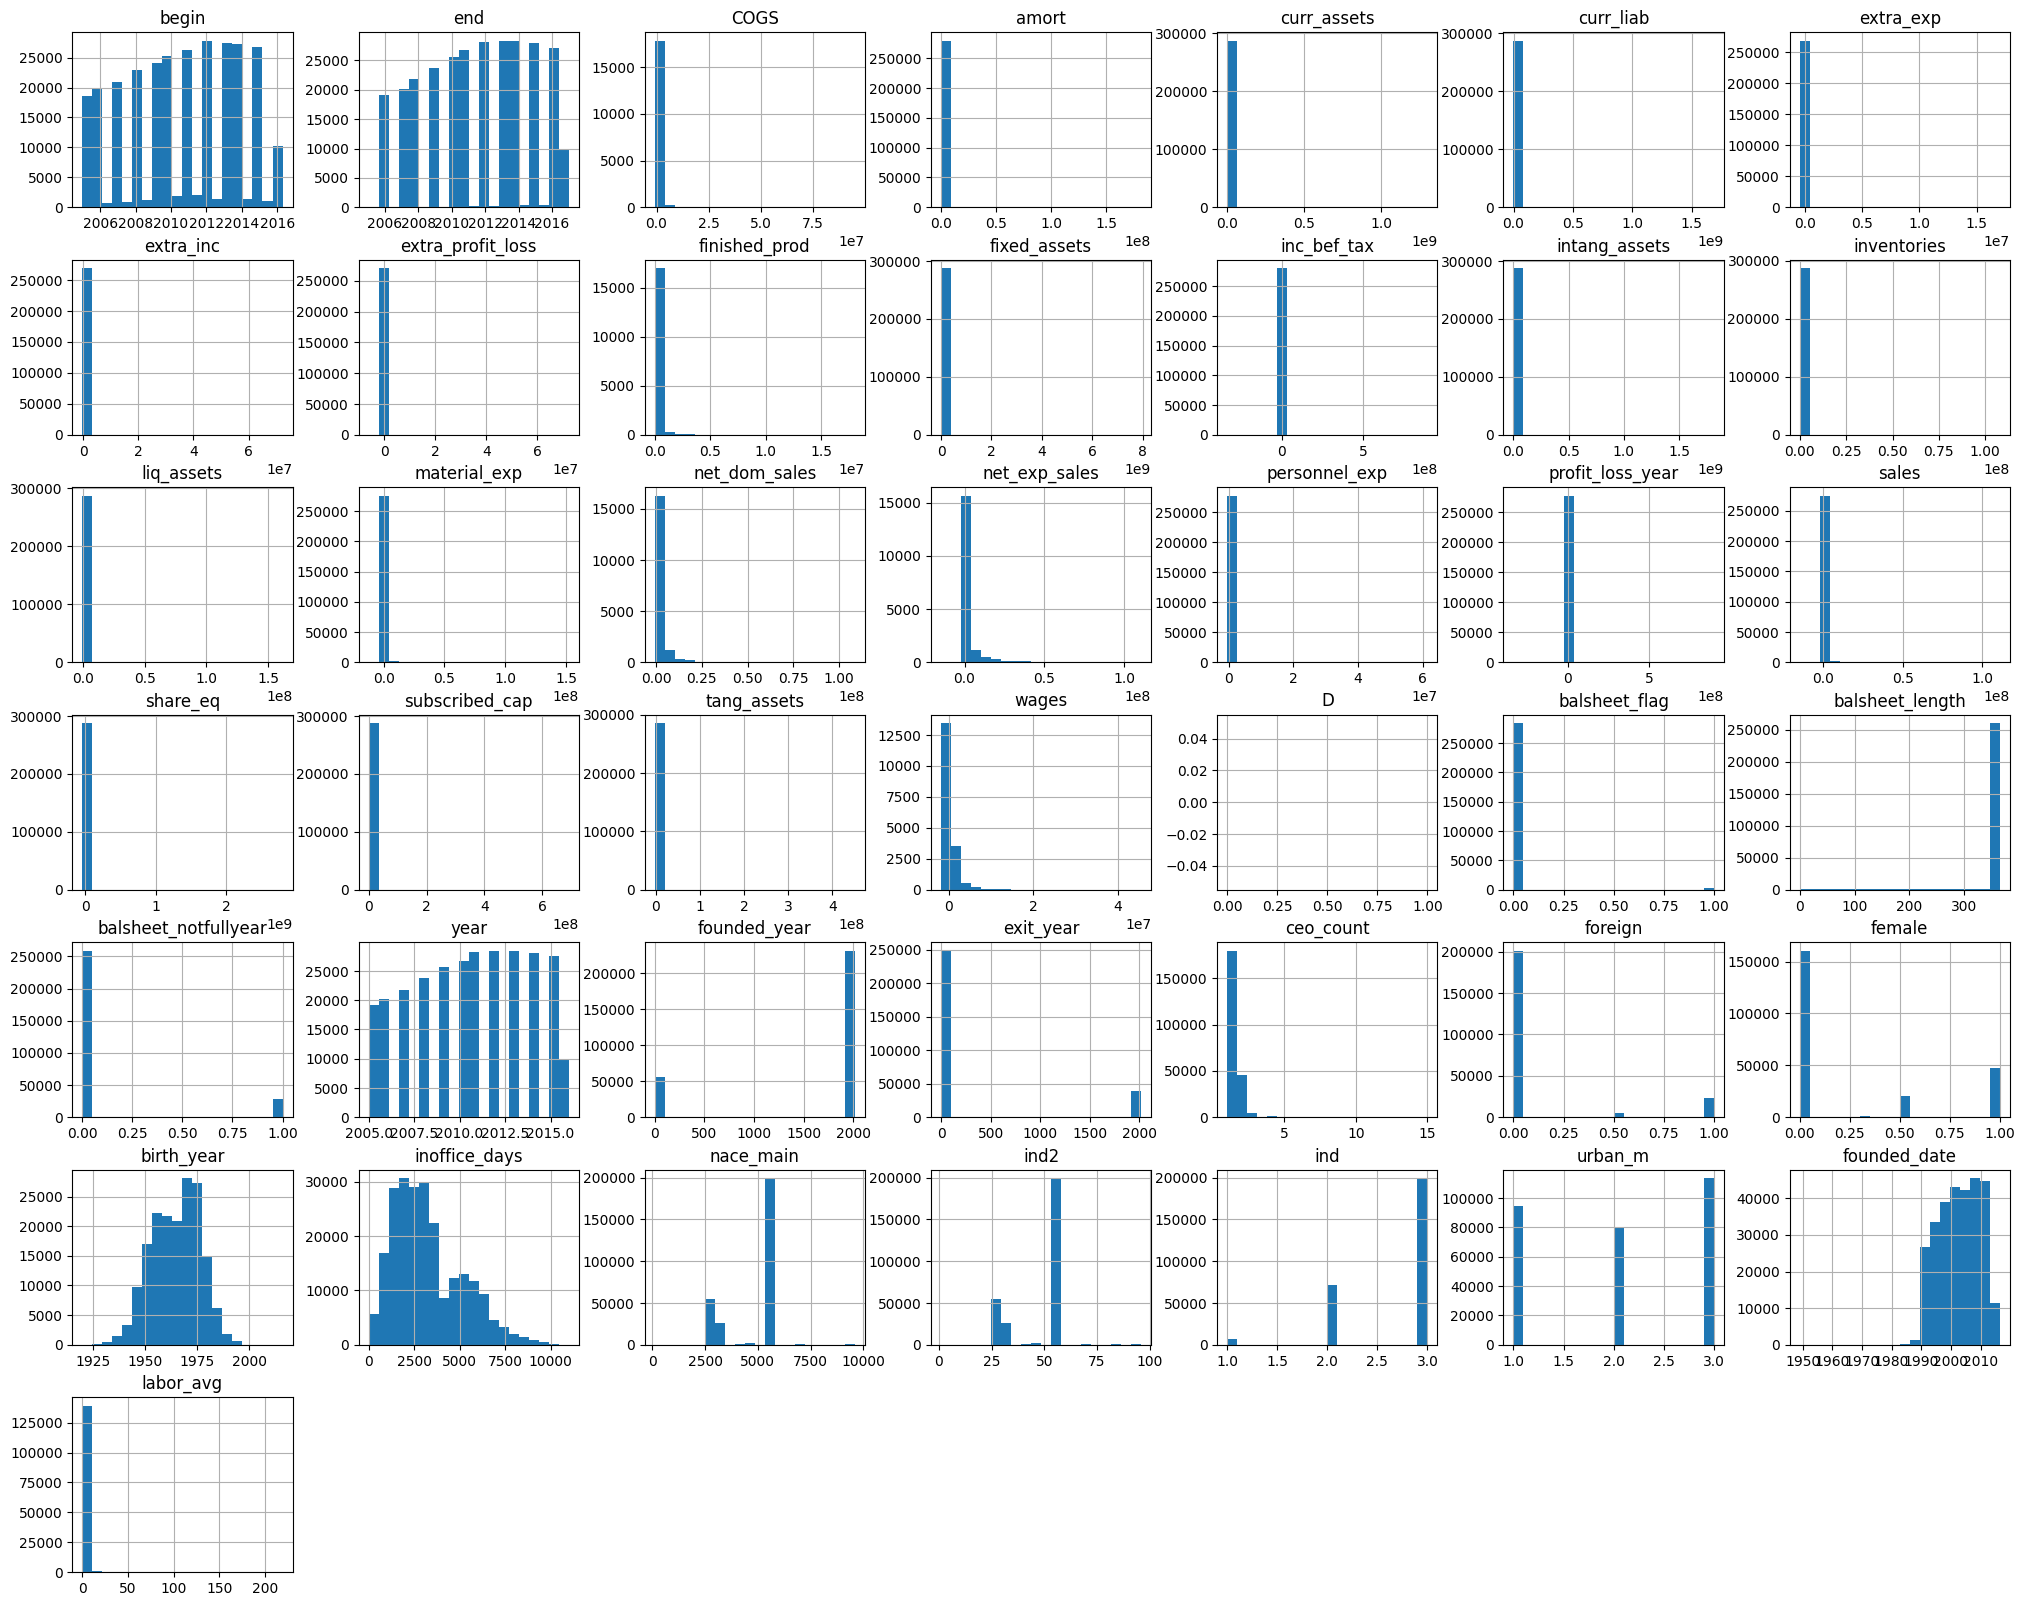

In [14]:
#criar histograma

df.hist(bins=20, figsize=(25,20));

In [15]:
#verificando uma empresa para melhor compreensão da tabela

import pandas as pd

pd.set_option('display.max_columns', None)  # Sem limite de colunas

df[df['comp_id'] == '1001034.0'] # 8898082.0

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,NaN,1229.629639,218.518524,0.0,4355.555664,2911.111084,38222.222656,NaN,NaN,22222.222656,62.962963,62751.851562,881.481506,1388.888916,1229.629639,NaN,NaN,0,364,0,2005,1990,0,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,NaN,725.925903,996.296326,0.0,7225.925781,5896.296387,38140.742188,NaN,NaN,23844.445312,755.555542,64625.925781,1637.036987,1388.888916,725.925903,NaN,NaN,0,364,0,2006,1990,0,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,NaN,1322.222168,570.370361,0.0,7951.852051,177.777771,40174.074219,NaN,NaN,22262.962891,0.000000,65100.000000,1633.333374,1388.888916,1322.222168,NaN,NaN,0,364,0,2007,1990,0,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,NaN,1022.222229,714.814819,0.0,5233.333496,1392.592651,54274.074219,NaN,NaN,21107.408203,0.000000,78085.187500,1725.925903,1481.481445,1022.222229,NaN,NaN,0,365,0,2008,1990,0,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,NaN,814.814819,-11044.444336,0.0,3259.259277,11.111111,41755.554688,NaN,NaN,13237.037109,-11074.074219,45388.890625,-9348.148438,1481.481445,814.814819,NaN,NaN,0,364,0,2009,1990,0,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,0.083333
5,1001034.0,2010-01-01,2010-12-31,NaN,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,NaN,637.037048,-7548.147949,0.0,0.000000,192.592590,10996.295898,NaN,NaN,5081.481445,-7548.147949,9929.629883,-16896.296875,1481.481445,637.037048,NaN,NaN,0,364,0,2010,1990,0,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,0.083333
6,1001034.0,2011-01-01,2011-12-31,NaN,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,NaN,481.481476,-1570.370361,0.0,0.000000,1633.333374,200.000000,NaN,NaN,225.925919,-1570.370361,0.000000,-18466.666016,1481.481445,481.481476,NaN,NaN,0,364,0,2011,1990,0,2.0,0.0,0.5,1954.0,4895.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,0.083333
7,1001034.0,2012-01-01,2012-12-31,NaN,140.740738,148.148148,21429.628906,0.0,0.0,0.0,NaN,340.740753,-2474.073975,0.0,0.000000,25.925926,1862.963013,NaN,NaN,285.185181,-2474.073975,0.000000,-20940.740234,1481.481445,340.740753,NaN,NaN,0,365,0,2012,1990,0,2.0,0.0,0.5,1954.0,4895.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,0.083333
8,1001034.0,2013-01-01,2013-12-31,NaN,140.740738,140.740738,21851.851562,0.0,0.0,0.0,NaN,200.000000,-614.814819,0.0,0.000000,37.037037,177.777771,NaN,NaN,296.296295,-633.333313,0.000000,-21574.074219,1481.481445,200.000000,NaN,NaN,0,364,0,2013,1990,0,2.0,0.0,0.5,1954.0,4895.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,NaN
9,1001034.0,2014-01-01,2014-12-31,NaN,29.629629,144.444443,22340.740234,0.0,0.0,0.0,NaN,170.370377,-448.148163,0.0,0.000000,40.740742,114.814812,NaN,NaN,303.703705,-448.148163,0.000000,-22025.925781,1481.481445,170.370377,NaN,NaN,0,364,0,2014,1990,0,2.0,0.0,0.5,1954.0,4895.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,0,NaN


<Axes: >

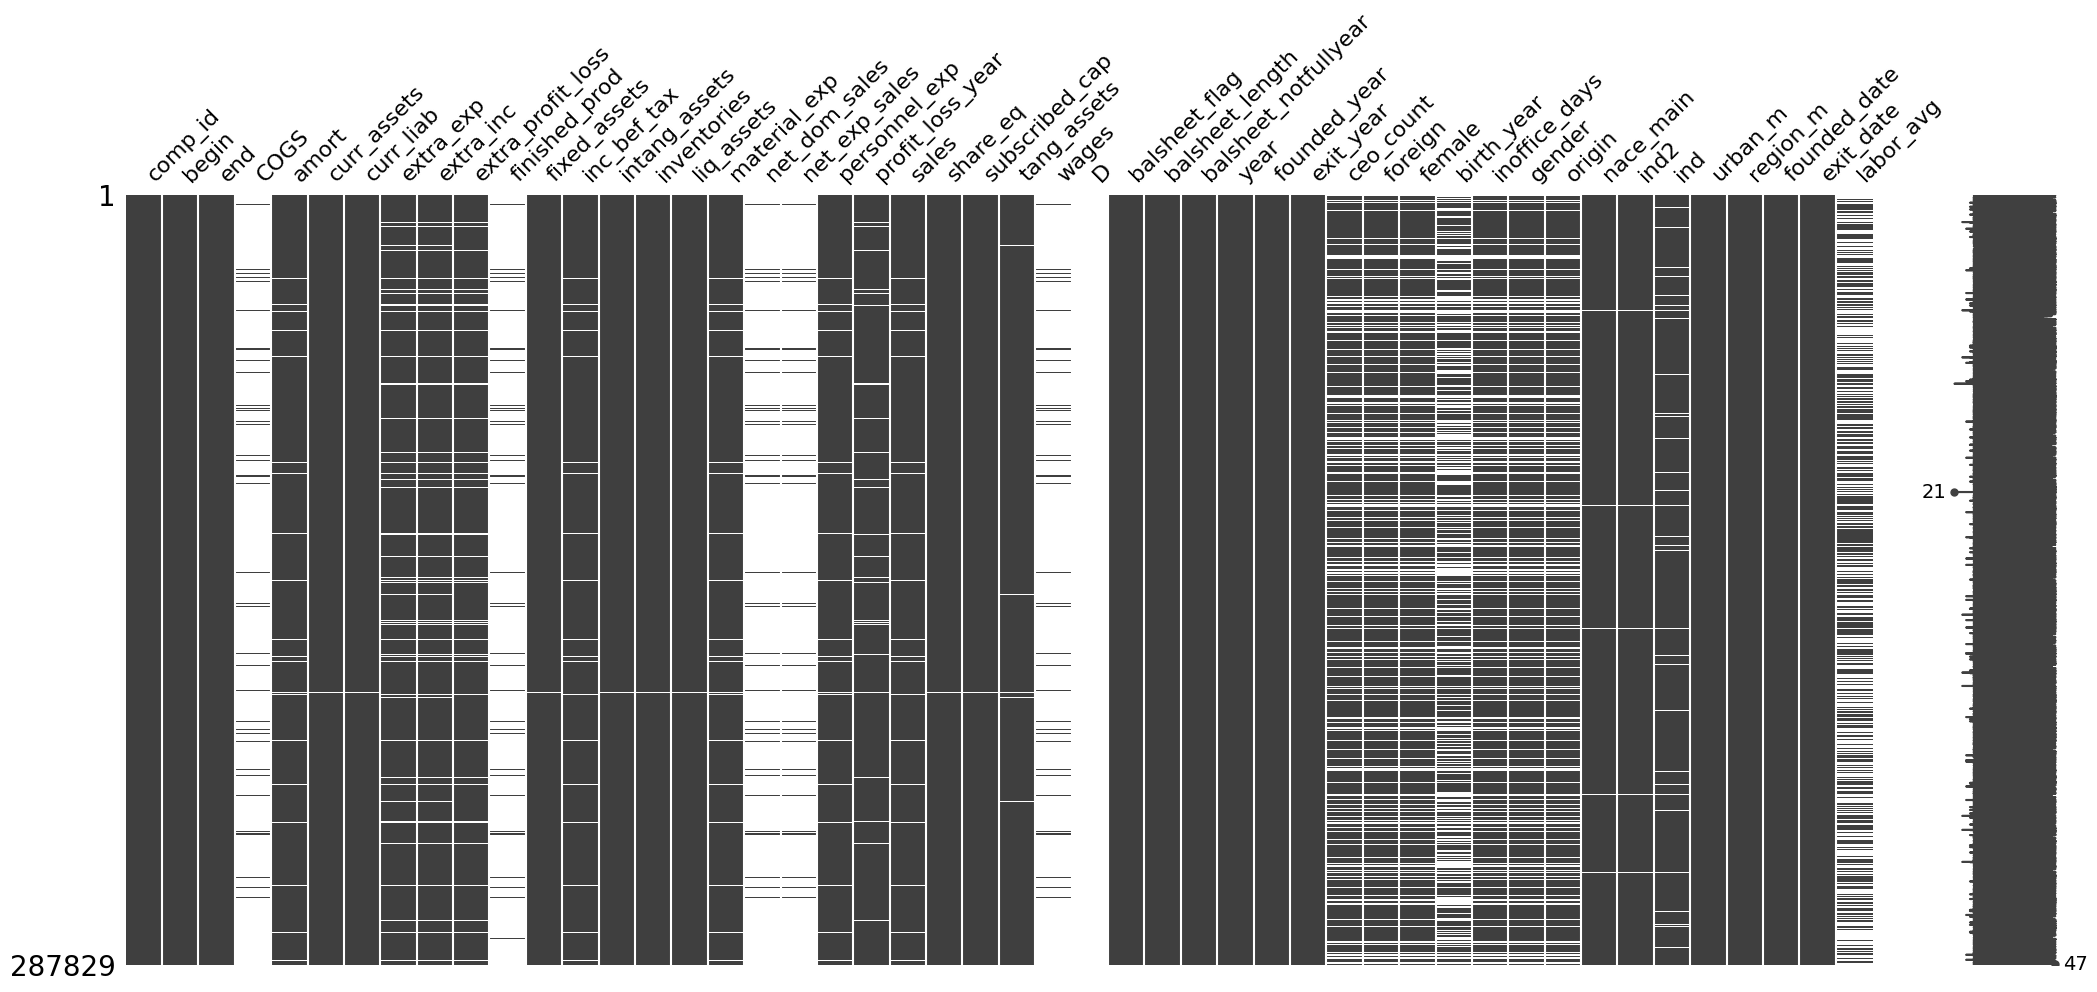

In [16]:
#usando o MISSINGNO para avaliar colunas com muito missing

msno.matrix(df)

Diante da presença de valores ausentes em algumas variáveis preditoras, optamos por adotar um critério de exclusão para aquelas com 90% ou mais de missing, com o objetivo de aumentar a confiabilidade da base e evitar possíveis inconsistências nas análises futuras.

In [17]:
#calcula a proporção de missing por coluna
missing_ratio = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

print(missing_ratio)

#busca o nome das colunas em que há menos de 90% de missing values
cols_to_keep = missing_ratio[missing_ratio <= 0.9].index

#considera no novo dataframe apenas as colunas com menos de 90% de missings
df_filter = df[cols_to_keep]

D                       1.000000
finished_prod           0.939252
wages                   0.937522
COGS                    0.936570
net_exp_sales           0.936570
net_dom_sales           0.936570
labor_avg               0.509094
birth_year              0.388488
female                  0.196043
ceo_count               0.196043
origin                  0.196043
foreign                 0.196043
gender                  0.196043
inoffice_days           0.196043
extra_inc               0.064375
extra_exp               0.064375
extra_profit_loss       0.059768
profit_loss_year        0.034340
ind                     0.033940
amort                   0.027933
personnel_exp           0.027933
material_exp            0.027933
sales                   0.025838
inc_bef_tax             0.025838
tang_assets             0.005107
nace_main               0.003606
ind2                    0.003606
region_m                0.002918
intang_assets           0.000486
inventories             0.000455
fixed_asse

In [18]:
# Subtitui os valores nulos de sales por zero, considerando que se o valor está nulo, a empresa não teve venda no ano:

df_filter['sales'].fillna(0, inplace=True)

C:\Users\marcel.sanchez\AppData\Local\Temp\ipykernel_10592\1030173048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filter['sales'].fillna(0, inplace=True)
C:\Users\marcel.sanchez\AppData\Local\Temp\ipykernel_10592\1030173048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['sales'].fillna(0, inplace=True)


In [19]:
df_filter.describe()

,labor_avg,birth_year,female,ceo_count,foreign,inoffice_days,extra_inc,extra_exp,extra_profit_loss,profit_loss_year,ind,amort,personnel_exp,material_exp,sales,inc_bef_tax,tang_assets,nace_main,ind2,intang_assets,inventories,fixed_assets,curr_assets,curr_liab,share_eq,subscribed_cap,liq_assets,founded_date,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m
count,141297.000000,176011.000000,231402.000000,231402.000000,231402.000000,231402.000000,2.693000e+05,2.693000e+05,2.706260e+05,2.779450e+05,278060.000000,2.797890e+05,2.797890e+05,2.797890e+05,2.878290e+05,2.803920e+05,2.863590e+05,286791.000000,286791.000000,2.876890e+05,2.876980e+05,2.876980e+05,2.876980e+05,2.876980e+05,2.876980e+05,2.876980e+05,2.876980e+05,287778,287829,287829,287829.000000,287829.000000,287829.000000,287829.000000,287829.000000,287829.000000,287829.000000
mean,1.009435,1964.902661,0.255157,1.254038,0.115653,3205.323629,3.754458e+03,1.521749e+03,2.229149e+03,5.152337e+03,2.692023,2.353264e+04,9.229396e+04,3.594648e+05,4.912223e+05,2.332423e+04,2.216273e+05,4858.231479,48.353062,3.782416e+04,6.052729e+04,3.393731e+05,2.209395e+05,1.742499e+05,2.350564e+05,7.741440e+04,4.098719e+04,2002-09-10 01:55:18.533036032,2010-08-13 19:05:07.495075584,2011-07-25 09:07:07.191144960,1609.454999,2010.570356,0.100237,345.584719,0.013327,271.897853,2.067075
min,0.000000,1920.000000,0.000000,1.000000,0.000000,1.000000,-2.744074e+05,-4.902703e+05,-6.181263e+06,-3.355148e+08,1.000000,-3.076704e+05,-4.338074e+05,-1.239974e+07,-1.472559e+07,-3.355148e+08,-2.390456e+06,111.000000,1.000000,-3.770370e+03,-3.069630e+04,-2.394226e+06,-5.555556e+05,-7.727111e+05,-4.210445e+07,-5.555556e+05,-5.555556e+05,1948-12-30 00:00:00,2005-01-01 00:00:00,2005-01-11 00:00:00,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.090909,1956.000000,0.000000,1.000000,0.000000,1775.000000,0.000000e+00,0.000000e+00,0.000000e+00,-3.270370e+03,2.000000,3.333333e+01,4.888889e+02,3.433333e+03,3.837037e+03,-3.388889e+03,0.000000e+00,3314.000000,33.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.203704e+03,1.833333e+03,-4.533333e+03,1.851852e+03,3.370370e+02,1997-01-10 00:00:00,2008-01-01 00:00:00,2008-12-31 00:00:00,1991.000000,2008.000000,0.000000,364.000000,0.000000,0.000000,1.000000
50%,0.243056,1966.000000,0.000000,1.000000,0.000000,2838.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,7.814815e+02,7.885185e+03,2.361481e+04,3.062593e+04,7.037037e+01,3.311111e+03,5610.000000,56.000000,0.000000e+00,4.555555e+02,3.825926e+03,9.592593e+03,1.049259e+04,3.838889e+03,5.555556e+03,1.851852e+03,2002-12-20 00:00:00,2011-01-01 00:00:00,2011-12-31 00:00:00,2000.000000,2011.000000,0.000000,364.000000,0.000000,0.000000,2.000000
75%,0.583333,1974.000000,0.500000,1.000000,0.000000,4468.750000,0.000000e+00,0.000000e+00,0.000000e+00,1.914815e+03,3.000000,4.003704e+03,2.640741e+04,8.700000e+04,1.161481e+05,3.774074e+03,3.299630e+04,5610.000000,56.000000,0.000000e+00,5.580556e+03,3.593982e+04,3.552130e+04,4.101852e+04,2.706296e+04,1.111111e+04,9.503704e+03,2008-10-08 00:00:00,2013-01-01 00:00:00,2013-12-31 00:00:00,2007.000000,2013.000000,0.000000,364.000000,0.000000,0.000000,3.000000
max,219.333344,2016.000000,1.000000,15.000000,1.000000,10983.000000,7.233078e+07,1.704172e+07,7.233078e+07,8.977000e+08,3.000000,1.820889e+08,6.146913e+07,1.521631e+08,1.110294e+08,8.977000e+08,4.511007e+08,9609.000000,96.000000,1.813456e+09,1.078533e+08,7.940211e+09,1.299011e+09,1.683374e+09,2.795907e+09,6.918000e+08,1.617547e+08,2016-06-30 00:00:00,2016-04-15 00:00:00,2016-12-31 00:00:00,2015.000000,2016.000000,1.000000,365.000000,1.000000,2017.000000,3.000000
std,4.771655,11.546875,0.406538,0.517837,0.308518,1880.553038,1.727794e+05,7.237342e+04,1.611169e+05,1.892475e+06,0.512269,8.216668e+05,7.058337e+05,2.940907e+06,3.812510e+06,2.413799e+06,2.580851e+06,1250.012437,12.570550,6.260181e+06,6.670054e+05,1.823176e+07,4.182020e+06,3.730357e+06,7.465366e+06

#### Removendo dos dados os registros do ano de 2016

In [20]:
#aplica o filtro para remover o ano de 2016
df_filter = df_filter[df_filter['year'] != 2016]

print(df_filter.shape)

(278086, 42)


#### Removendo dos dados empresas que deixaram de operar

Processo para criar a nova variável que será o objeto da predição:  

Aqui, optamos por criar um novo DataFrame para realizar testes e aplicar regras de exclusão de empresas, ao invés de modificar diretamente a base original. Essa prática nos garante a preservação dos dados brutos, facilita o teste de diferentes lógicas de filtragem, e permite uma análise comparativa dos impactos dessas decisões. Além disso, torna o processo mais transparente, seguro e modular ao longo do pipeline de pré-processamento.

In [21]:
#cria um df apenas com 3 variáveis
df_teste = df_filter[['comp_id', 'year', 'sales']]
df_teste

,comp_id,year,sales
0,1001034.0,2005,62751.851562
1,1001034.0,2006,64625.925781
2,1001034.0,2007,65100.000000
3,1001034.0,2008,78085.187500
4,1001034.0,2009,45388.890625
...,...,...,...
287824,464120938496.0,2011,288.888885
287825,464120938496.0,2012,0.000000
287826,464120938496.0,2013,0.000000
287827,464120938496.0,2014,0.000000


In [22]:
import numpy as np

# Ordena por empresa e ano, essencial para a lógica funcionar corretamente
df_teste = df_teste.sort_values(by=['comp_id', 'year'])

# Cria a coluna com as vendas do ano anterior (dentro de cada empresa)
df_teste['prev_year_sales'] = df_teste.groupby('comp_id')['sales'].shift(1)

# Define a flag 'fechou': 1 se a empresa teve 2 anos consecutivos com sales == 0
df_teste['fechou'] = np.where(
    (df_teste['sales'] == 0) & (df_teste['prev_year_sales'] == 0),
    1,
    0
)
df_teste.head(10)

,comp_id,year,sales,prev_year_sales,fechou
4240,100001576.0,2015,0.000000,NaN,0
134061,100007469056.0,2005,2303.703613,NaN,0
134062,100007469056.0,2006,185.185181,2303.703613,0
134063,100007469056.0,2007,725.925903,185.185181,0
134064,100007469056.0,2008,1122.222168,725.925903,0
134065,100007469056.0,2009,0.000000,1122.222168,0
134066,100007469056.0,2010,0.000000,0.000000,1
134067,100007469056.0,2011,0.000000,0.000000,1
134068,100007469056.0,2012,0.000000,0.000000,1
134069,100007469056.0,2013,0.000000,0.000000,1


In [23]:
# Testando se o código anterior funcionou, selecionando apenas uma empresa da base

pd.set_option('display.max_columns', None)  # Sem limite de colunas


df_teste[df_teste['comp_id'] == '1001034.0']

,comp_id,year,sales,prev_year_sales,fechou
0,1001034.0,2005,62751.851562,NaN,0
1,1001034.0,2006,64625.925781,62751.851562,0
2,1001034.0,2007,65100.000000,64625.925781,0
3,1001034.0,2008,78085.187500,65100.000000,0
4,1001034.0,2009,45388.890625,78085.187500,0
5,1001034.0,2010,9929.629883,45388.890625,0
6,1001034.0,2011,0.000000,9929.629883,0
7,1001034.0,2012,0.000000,0.000000,1
8,1001034.0,2013,0.000000,0.000000,1
9,1001034.0,2014,0.000000,0.000000,1


In [24]:
print(df_filter.shape)
print(df_teste.shape)

(278086, 42)
(278086, 5)


In [25]:
df_filter.head()

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,extra_inc,extra_exp,extra_profit_loss,profit_loss_year,ind,amort,personnel_exp,material_exp,sales,inc_bef_tax,tang_assets,nace_main,ind2,region_m,intang_assets,inventories,fixed_assets,curr_assets,curr_liab,share_eq,subscribed_cap,liq_assets,founded_date,comp_id,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,exit_date
0,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,62.962963,3.0,692.592590,22222.222656,38222.222656,62751.851562,218.518524,1229.629639,5630.0,56.0,Central,0.0,4355.555664,1229.629639,7266.666504,7574.074219,881.481506,1388.888916,2911.111084,1990-11-19,1001034.0,2005-01-01,2005-12-31,1990,2005,0,364,0,0,1,0
1,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,755.555542,3.0,603.703674,23844.445312,38140.742188,64625.925781,996.296326,725.925903,5630.0,56.0,Central,0.0,7225.925781,725.925903,13122.222656,12211.111328,1637.036987,1388.888916,5896.296387,1990-11-19,1001034.0,2006-01-01,2006-12-31,1990,2006,0,364,0,0,1,0
2,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,0.000000,3.0,425.925934,22262.962891,40174.074219,65100.000000,570.370361,1322.222168,5630.0,56.0,Central,0.0,7951.852051,1322.222168,8196.295898,7800.000000,1633.333374,1388.888916,177.777771,1990-11-19,1001034.0,2007-01-01,2007-12-31,1990,2007,0,364,0,0,1,0
3,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,0.000000,3.0,300.000000,21107.408203,54274.074219,78085.187500,714.814819,1022.222229,5630.0,56.0,Central,0.0,5233.333496,1022.222229,8485.185547,7781.481445,1725.925903,1481.481445,1392.592651,1990-11-19,1001034.0,2008-01-01,2008-12-31,1990,2008,0,365,0,0,1,0
4,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,-11074.074219,3.0,207.407410,13237.037109,41755.554688,45388.890625,-11044.444336,814.814819,5630.0,56.0,Central,0.0,3259.259277,814.814819,5137.037109,15300.000000,-9348.148438,1481.481445,11.111111,1990-11-19,1001034.0,2009-01-01,2009-12-31,1990,2009,0,364,0,0,1,0


In [26]:
# Join com a tabela df_merged para trazer coluna "fechou"

df_filter = df_filter.merge(df_teste[['comp_id', 'year', 'fechou']], on=['comp_id', 'year'], how='left')

In [27]:
df_filter.head()

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,extra_inc,extra_exp,extra_profit_loss,profit_loss_year,ind,amort,personnel_exp,material_exp,sales,inc_bef_tax,tang_assets,nace_main,ind2,region_m,intang_assets,inventories,fixed_assets,curr_assets,curr_liab,share_eq,subscribed_cap,liq_assets,founded_date,comp_id,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,exit_date,fechou
0,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,62.962963,3.0,692.592590,22222.222656,38222.222656,62751.851562,218.518524,1229.629639,5630.0,56.0,Central,0.0,4355.555664,1229.629639,7266.666504,7574.074219,881.481506,1388.888916,2911.111084,1990-11-19,1001034.0,2005-01-01,2005-12-31,1990,2005,0,364,0,0,1,0,0
1,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,755.555542,3.0,603.703674,23844.445312,38140.742188,64625.925781,996.296326,725.925903,5630.0,56.0,Central,0.0,7225.925781,725.925903,13122.222656,12211.111328,1637.036987,1388.888916,5896.296387,1990-11-19,1001034.0,2006-01-01,2006-12-31,1990,2006,0,364,0,0,1,0,0
2,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,0.000000,3.0,425.925934,22262.962891,40174.074219,65100.000000,570.370361,1322.222168,5630.0,56.0,Central,0.0,7951.852051,1322.222168,8196.295898,7800.000000,1633.333374,1388.888916,177.777771,1990-11-19,1001034.0,2007-01-01,2007-12-31,1990,2007,0,364,0,0,1,0,0
3,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,0.000000,3.0,300.000000,21107.408203,54274.074219,78085.187500,714.814819,1022.222229,5630.0,56.0,Central,0.0,5233.333496,1022.222229,8485.185547,7781.481445,1725.925903,1481.481445,1392.592651,1990-11-19,1001034.0,2008-01-01,2008-12-31,1990,2008,0,365,0,0,1,0,0
4,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,-11074.074219,3.0,207.407410,13237.037109,41755.554688,45388.890625,-11044.444336,814.814819,5630.0,56.0,Central,0.0,3259.259277,814.814819,5137.037109,15300.000000,-9348.148438,1481.481445,11.111111,1990-11-19,1001034.0,2009-01-01,2009-12-31,1990,2009,0,364,0,0,1,0,0


In [28]:
df_filter['fechou'].unique()

array([0, 1])

#### Filtrando apenas dados de 2012

In [29]:
# Criando uma base com as empresas que tem registro em 2012

df_2012 = df_filter[['comp_id','year']][df_filter['year'] == 2012.0]
df_2012.head()

,comp_id,year
7,1001034.0,2012
14,1001541.0,2012
23,1002029.0,2012
34,1003200.0,2012
47,1007261.0,2012


In [30]:
# Filtrar as empresas que tem registro em 2012, usando a base df_2012 criada no código acima:

df2 = df_filter[df_filter['comp_id'].isin(df_2012['comp_id'])]

df2.head()

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,extra_inc,extra_exp,extra_profit_loss,profit_loss_year,ind,amort,personnel_exp,material_exp,sales,inc_bef_tax,tang_assets,nace_main,ind2,region_m,intang_assets,inventories,fixed_assets,curr_assets,curr_liab,share_eq,subscribed_cap,liq_assets,founded_date,comp_id,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,exit_date,fechou
0,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,62.962963,3.0,692.592590,22222.222656,38222.222656,62751.851562,218.518524,1229.629639,5630.0,56.0,Central,0.0,4355.555664,1229.629639,7266.666504,7574.074219,881.481506,1388.888916,2911.111084,1990-11-19,1001034.0,2005-01-01,2005-12-31,1990,2005,0,364,0,0,1,0,0
1,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,755.555542,3.0,603.703674,23844.445312,38140.742188,64625.925781,996.296326,725.925903,5630.0,56.0,Central,0.0,7225.925781,725.925903,13122.222656,12211.111328,1637.036987,1388.888916,5896.296387,1990-11-19,1001034.0,2006-01-01,2006-12-31,1990,2006,0,364,0,0,1,0,0
2,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,0.000000,3.0,425.925934,22262.962891,40174.074219,65100.000000,570.370361,1322.222168,5630.0,56.0,Central,0.0,7951.852051,1322.222168,8196.295898,7800.000000,1633.333374,1388.888916,177.777771,1990-11-19,1001034.0,2007-01-01,2007-12-31,1990,2007,0,364,0,0,1,0,0
3,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,0.000000,3.0,300.000000,21107.408203,54274.074219,78085.187500,714.814819,1022.222229,5630.0,56.0,Central,0.0,5233.333496,1022.222229,8485.185547,7781.481445,1725.925903,1481.481445,1392.592651,1990-11-19,1001034.0,2008-01-01,2008-12-31,1990,2008,0,365,0,0,1,0,0
4,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,-11074.074219,3.0,207.407410,13237.037109,41755.554688,45388.890625,-11044.444336,814.814819,5630.0,56.0,Central,0.0,3259.259277,814.814819,5137.037109,15300.000000,-9348.148438,1481.481445,11.111111,1990-11-19,1001034.0,2009-01-01,2009-12-31,1990,2009,0,364,0,0,1,0,0


In [31]:
# Verificando o novo tamanho da base:

print(df2.shape)

(228536, 43)


In [32]:
df2.describe()

,labor_avg,birth_year,female,ceo_count,foreign,inoffice_days,extra_inc,extra_exp,extra_profit_loss,profit_loss_year,ind,amort,personnel_exp,material_exp,sales,inc_bef_tax,tang_assets,nace_main,ind2,intang_assets,inventories,fixed_assets,curr_assets,curr_liab,share_eq,subscribed_cap,liq_assets,founded_date,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,fechou
count,116567.000000,151098.000000,188703.000000,188703.000000,188703.000000,188703.000000,2.228110e+05,2.228110e+05,2.232450e+05,2.284430e+05,220973.000000,2.227870e+05,2.227870e+05,2.227870e+05,2.285360e+05,2.232650e+05,2.280060e+05,228478.000000,228478.000000,2.284430e+05,2.284510e+05,2.284510e+05,2.284510e+05,2.284510e+05,2.284510e+05,2.284510e+05,2.284510e+05,228524,228536,228536,228536.000000,228536.000000,228536.000000,228536.000000,228536.000000,228536.000000,228536.000000,228536.000000
mean,1.025602,1964.336354,0.254622,1.263022,0.112530,3405.368058,3.504257e+03,1.541492e+03,1.963498e+03,5.506574e+03,2.670648,1.979902e+04,9.440607e+04,3.564550e+05,4.935537e+05,1.900498e+04,2.267314e+05,4804.843714,47.814665,9.130920e+03,6.004577e+04,2.900562e+05,2.057538e+05,1.644917e+05,2.187372e+05,8.290031e+04,4.131154e+04,2002-02-28 14:02:43.077838592,2010-08-31 05:33:28.751356416,2011-08-16 21:17:03.404627968,1652.748272,2010.630273,0.072256,350.655262,0.010458,160.023716,2.078627,0.099512
min,0.000000,1920.000000,0.000000,1.000000,0.000000,1.000000,-2.744074e+05,-1.335852e+05,-6.181263e+06,-7.078652e+07,1.000000,-3.076704e+05,-3.106000e+05,-1.888952e+06,-1.475444e+05,-7.078652e+07,-2.390456e+06,111.000000,1.000000,-3.770370e+03,-3.069630e+04,-2.394226e+06,-5.555556e+05,-7.727111e+05,-4.210445e+07,-5.555556e+05,-5.555556e+05,1949-11-28 00:00:00,2005-01-01 00:00:00,2005-02-18 00:00:00,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.090909,1956.000000,0.000000,1.000000,0.000000,1979.500000,0.000000e+00,0.000000e+00,0.000000e+00,-2.696296e+03,2.000000,5.185185e+01,4.888889e+02,3.625926e+03,4.666667e+03,-2.840741e+03,0.000000e+00,3312.000000,33.000000,0.000000e+00,0.000000e+00,4.814815e+01,2.300000e+03,1.892593e+03,-4.018519e+03,1.851852e+03,3.629630e+02,1996-09-04 00:00:00,2008-01-01 00:00:00,2008-12-31 00:00:00,1992.000000,2008.000000,0.000000,364.000000,0.000000,0.000000,1.000000,0.000000
50%,0.242424,1965.000000,0.000000,1.000000,0.000000,3013.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,8.740741e+02,8.248148e+03,2.419630e+04,3.246667e+04,1.925926e+02,4.200000e+03,5610.000000,56.000000,0.000000e+00,5.333333e+02,4.825926e+03,9.896296e+03,1.084074e+04,4.729629e+03,4.444444e+03,1.870370e+03,2002-04-12 00:00:00,2011-01-01 00:00:00,2011-12-31 00:00:00,2000.000000,2011.000000,0.000000,364.000000,0.000000,0.000000,2.000000,0.000000
75%,0.576389,1973.000000,0.500000,1.000000,0.000000,4762.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.377778e+03,3.000000,4.311111e+03,2.739630e+04,8.836852e+04,1.202778e+05,4.222222e+03,3.869259e+04,5610.000000,56.000000,0.000000e+00,5.892593e+03,4.221296e+04,3.718518e+04,4.255555e+04,3.119630e+04,1.111111e+04,9.644444e+03,2008-05-13 00:00:00,2013-01-01 00:00:00,2013-12-31 00:00:00,2007.000000,2013.000000,0.000000,364.000000,0.000000,0.000000,3.000000,0.000000
max,219.333344,2016.000000,1.000000,15.000000,1.000000,10983.000000,1.709684e+07,1.704172e+07,1.268413e+07,7.433685e+07,3.000000,3.231915e+07,6.146913e+07,1.003452e+08,1.107458e+08,9.970761e+07,4.511007e+08,9609.000000,96.000000,1.594445e+08,4.158996e+07,2.696748e+09,1.411015e+08,3.264051e+08,6.982296e+08,6.918000e+08,1.325932e+08,2016-06-30 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2015.000000,2015.000000,1.000000,365.000000,1.000000,2017.000000,3.000000,1.000000
std,4.829032,11.436096,0.404696,0.524533,0.304479,1863.081490,1.045444e+05,7.464007e+04,8.106135e+04,3.732054e+05,0.522005,2.333166e+05,7.036967e+05,2.753657e+06,3.615547e+06,5.450283e+05,2.496358e+06,1276.537909,12.836298,6.

In [33]:
df2.head(10)

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,extra_inc,extra_exp,extra_profit_loss,profit_loss_year,ind,amort,personnel_exp,material_exp,sales,inc_bef_tax,tang_assets,nace_main,ind2,region_m,intang_assets,inventories,fixed_assets,curr_assets,curr_liab,share_eq,subscribed_cap,liq_assets,founded_date,comp_id,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,exit_date,fechou
0,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,62.962963,3.0,692.592590,22222.222656,38222.222656,62751.851562,218.518524,1229.629639,5630.0,56.0,Central,0.0,4355.555664,1229.629639,7266.666504,7574.074219,881.481506,1388.888916,2911.111084,1990-11-19,1001034.0,2005-01-01,2005-12-31,1990,2005,0,364,0,0,1,0,0
1,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,755.555542,3.0,603.703674,23844.445312,38140.742188,64625.925781,996.296326,725.925903,5630.0,56.0,Central,0.0,7225.925781,725.925903,13122.222656,12211.111328,1637.036987,1388.888916,5896.296387,1990-11-19,1001034.0,2006-01-01,2006-12-31,1990,2006,0,364,0,0,1,0,0
2,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,0.000000,3.0,425.925934,22262.962891,40174.074219,65100.000000,570.370361,1322.222168,5630.0,56.0,Central,0.0,7951.852051,1322.222168,8196.295898,7800.000000,1633.333374,1388.888916,177.777771,1990-11-19,1001034.0,2007-01-01,2007-12-31,1990,2007,0,364,0,0,1,0,0
3,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,0.000000,3.0,300.000000,21107.408203,54274.074219,78085.187500,714.814819,1022.222229,5630.0,56.0,Central,0.0,5233.333496,1022.222229,8485.185547,7781.481445,1725.925903,1481.481445,1392.592651,1990-11-19,1001034.0,2008-01-01,2008-12-31,1990,2008,0,365,0,0,1,0,0
4,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,-11074.074219,3.0,207.407410,13237.037109,41755.554688,45388.890625,-11044.444336,814.814819,5630.0,56.0,Central,0.0,3259.259277,814.814819,5137.037109,15300.000000,-9348.148438,1481.481445,11.111111,1990-11-19,1001034.0,2009-01-01,2009-12-31,1990,2009,0,364,0,0,1,0,0
5,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,0.0,0.0,0.0,-7548.147949,3.0,177.777771,5081.481445,10996.295898,9929.629883,-7548.147949,637.037048,5630.0,56.0,Central,0.0,0.000000,637.037048,2096.296387,19629.628906,-16896.296875,1481.481445,192.592590,1990-11-19,1001034.0,2010-01-01,2010-12-31,1990,2010,0,364,0,0,1,0,0
6,0.083333,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,0.0,0.0,0.0,-1570.370361,3.0,155.555557,225.925919,200.000000,0.000000,-1570.370361,481.481476,5630.0,56.0,Central,0.0,0.000000,481.481476,3607.407471,22555.554688,-18466.666016,1481.481445,1633.333374,1990-11-19,1001034.0,2011-01-01,2011-12-31,1990,2011,0,364,0,0,1,0,0
7,0.083333,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,0.0,0.0,0.0,-2474.073975,3.0,140.740738,285.185181,1862.963013,0.000000,-2474.073975,340.740753,5630.0,56.0,Central,0.0,0.000000,340.740753,148.148148,21429.628906,-20940.740234,1481.481445,25.925926,1990-11-19,1001034.0,2012-01-01,2012-12-31,1990,2012,0,365,0,0,1,0,1
8,NaN,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,0.0,0.0,0.0,-633.333313,3.0,140.740738,296.296295,177.777771,0.000000,-614.814819,200.000000,5630.0,56.0,Central,0.0,0.000000,200.000000,140.740738,21851.851562,-21574.074219,1481.481445,37.037037,1990-11-19,1001034.0,2013-01-01,2013-12-31,1990,2013,0,364,0,0,1,0,1
9,NaN,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,0.0,0.0,0.0,-448.148163,3.0,29.629629,303.703705,114.814812,0.000000,-448.148163,170.370377,5630.0,56.0,Central,0.0,0.000000,170.370377,144.444443,22340.740234,-22025.925781,1481.481445,40.740742,1990-11-19,1001034.0,2014-01-01,2014-12-31,1990,2014,0,364,0,0,1,0,1


#### Identificando dados inconsistentes

A coluna "sales" apresenta alguns resultados negativos, o que não faz sentido. Será necessário substituir os valores negativos por zero.

In [34]:
# Substituir valores negativos por 0 de forma segura
df2.loc[df2['sales'] < 0, 'sales'] = 0

# Verificar se deu certo
df2['sales'].describe()

count    2.285360e+05
mean     4.935566e+05
std      3.615546e+06
min      0.000000e+00
25%      4.666667e+03
50%      3.246667e+04
75%      1.202778e+05
max      1.107458e+08
Name: sales, dtype: float64

In [35]:
# Garante que df2 é uma cópia segura
df2 = df2.copy()

# Criar a coluna log_sales apenas onde sales > 0, usando .loc
df2.loc[df2['sales'] > 0, 'log_sales'] = np.log(df2['sales'])

# Preencher os demais valores com 0 (onde sales <= 0)
df2['log_sales'] = df2['log_sales'].fillna(0)

# Visualizar
df2[['sales', 'log_sales']].tail()

c:\Users\marcel.sanchez\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sales,log_sales
278081,288.888885,5.666042
278082,0.000000,0.000000
278083,0.000000,0.000000
278084,0.000000,0.000000
278085,0.000000,0.000000


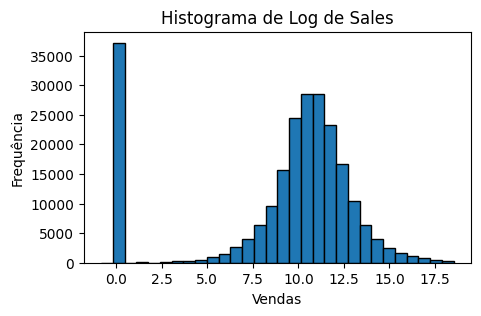

In [36]:
# Criando um histograma da coluna log_sales para verificar simétrica da nova coluna:

# Criar o histograma
plt.figure(figsize=(5, 3))  # Sets the figure size (width, height)
plt.hist(df2['log_sales'], bins=30, edgecolor='black')  # Creates histogram with 30 bins

# Adicionar títulos
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma de Log de Sales')

# Mostrar o gráfico
plt.show()

array([[<Axes: title={'center': 'labor_avg'}>,
        <Axes: title={'center': 'birth_year'}>,
        <Axes: title={'center': 'female'}>,
        <Axes: title={'center': 'ceo_count'}>,
        <Axes: title={'center': 'foreign'}>,
        <Axes: title={'center': 'inoffice_days'}>],
       [<Axes: title={'center': 'extra_inc'}>,
        <Axes: title={'center': 'extra_exp'}>,
        <Axes: title={'center': 'extra_profit_loss'}>,
        <Axes: title={'center': 'profit_loss_year'}>,
        <Axes: title={'center': 'ind'}>,
        <Axes: title={'center': 'amort'}>],
       [<Axes: title={'center': 'personnel_exp'}>,
        <Axes: title={'center': 'material_exp'}>,
        <Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'inc_bef_tax'}>,
        <Axes: title={'center': 'tang_assets'}>,
        <Axes: title={'center': 'nace_main'}>],
       [<Axes: title={'center': 'ind2'}>,
        <Axes: title={'center': 'intang_assets'}>,
        <Axes: title={'center': 'inventories'}

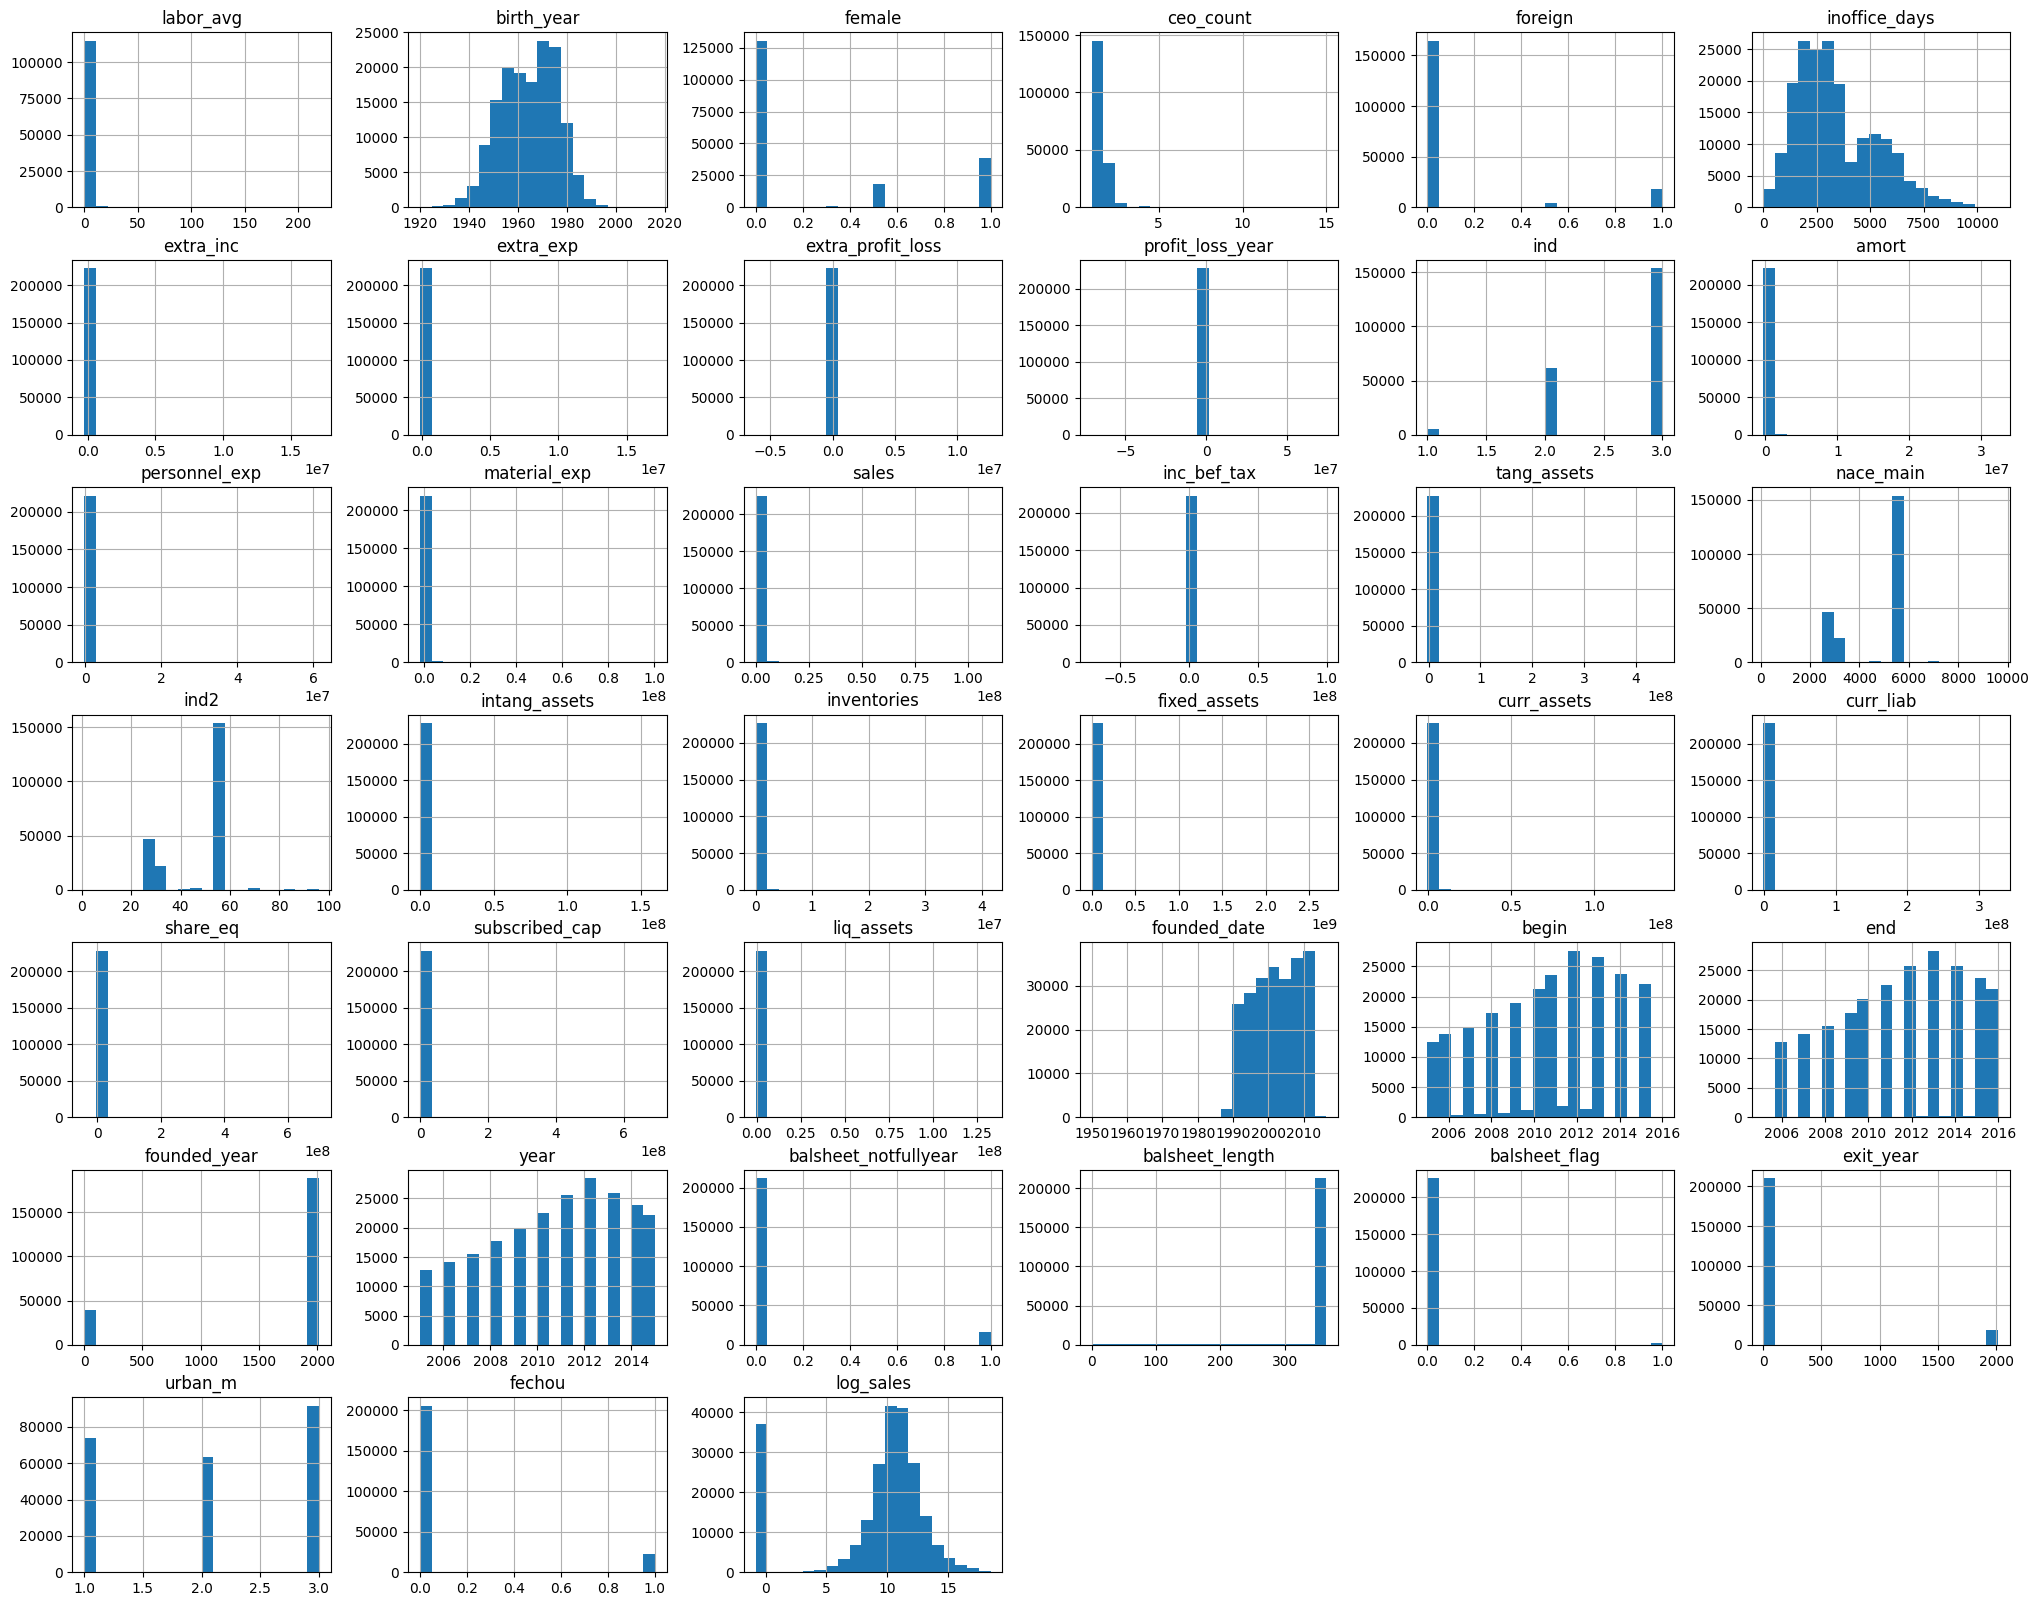

In [37]:
# Criando histogramas novamente para verificar assimetria em colunas

df2.hist(bins=20, figsize=(25,20))

Muitas colunas na tabela são assimétricas, principalmente as que contém valores monetários, será necessário fazer o log dos valores das seguintes colunas para deixá-las simétricas: extra_inc, extra_exp, extra_profit_loss, profit_loss_year, material_exp, amort, personnel_exp, inc_bef_tax,tang_assets, intang_assets, share_eq, liq_assets, inventories, fixed_assets, curr_liab, curr_assets, subscribed_cap.

In [38]:
# Criando colunas de log apenas para valores positivos
columns = ['extra_inc', 'extra_exp', 'extra_profit_loss', 'profit_loss_year', 'material_exp', 'amort', 
           'personnel_exp', 'inc_bef_tax', 'tang_assets', 'intang_assets', 'share_eq', 'liq_assets', 
           'inventories', 'fixed_assets', 'curr_liab', 'curr_assets', 'subscribed_cap']

for col in columns:
    df2[f'log_{col}'] = np.log(df2[col].where(df2[col] > 0)).fillna(0)

# Removendo as colunas originais
df2.drop(columns=columns, inplace=True)

# Visualizar as primeiras linhas
df2.head()

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,ind,sales,nace_main,ind2,region_m,founded_date,comp_id,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,exit_date,fechou,log_sales,log_extra_inc,log_extra_exp,log_extra_profit_loss,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_intang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap
0,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,62751.851562,5630.0,56.0,Central,1990-11-19,1001034.0,2005-01-01,2005-12-31,1990,2005,0,364,0,0,1,0,0,11.046943,0.0,0.0,0.0,4.142547,10.551172,6.540442,10.008848,5.386871,7.114468,0.0,6.781604,7.976290,8.379207,7.114468,8.932486,8.891053,7.236259
1,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,64625.925781,5630.0,56.0,Central,1990-11-19,1001034.0,2006-01-01,2006-12-31,1990,2006,0,364,0,0,1,0,0,11.076371,0.0,0.0,0.0,6.627453,10.549038,6.403083,10.079307,6.904045,6.587448,0.0,7.400643,8.682080,8.885431,6.587448,9.410102,9.482062,7.236259
2,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,65100.000000,5630.0,56.0,Central,1990-11-19,1001034.0,2007-01-01,2007-12-31,1990,2007,0,364,0,0,1,0,0,11.083680,0.0,0.0,0.0,0.000000,10.600977,6.054265,10.010680,6.346286,7.187069,0.0,7.398378,5.180534,8.981160,7.187069,8.961879,9.011438,7.236259
3,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,78085.187500,5630.0,56.0,Central,1990-11-19,1001034.0,2008-01-01,2008-12-31,1990,2008,0,365,0,0,1,0,0,11.265556,0.0,0.0,0.0,0.000000,10.901802,5.703782,9.957379,6.572024,6.929734,0.0,7.453519,7.238923,8.562804,6.929734,8.959502,9.046077,7.300798
4,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,45388.890625,5630.0,56.0,Central,1990-11-19,1001034.0,2009-01-01,2009-12-31,1990,2009,0,364,0,0,1,0,0,10.723023,0.0,0.0,0.0,0.000000,10.639588,5.334685,9.490774,0.000000,6.702961,0.0,0.000000,2.407946,8.089255,6.702961,9.635608,8.544232,7.300798


array([[<Axes: title={'center': 'labor_avg'}>,
        <Axes: title={'center': 'birth_year'}>,
        <Axes: title={'center': 'female'}>,
        <Axes: title={'center': 'ceo_count'}>,
        <Axes: title={'center': 'foreign'}>,
        <Axes: title={'center': 'inoffice_days'}>],
       [<Axes: title={'center': 'ind'}>,
        <Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'nace_main'}>,
        <Axes: title={'center': 'ind2'}>,
        <Axes: title={'center': 'founded_date'}>,
        <Axes: title={'center': 'begin'}>],
       [<Axes: title={'center': 'end'}>,
        <Axes: title={'center': 'founded_year'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'balsheet_notfullyear'}>,
        <Axes: title={'center': 'balsheet_length'}>,
        <Axes: title={'center': 'balsheet_flag'}>],
       [<Axes: title={'center': 'exit_year'}>,
        <Axes: title={'center': 'urban_m'}>,
        <Axes: title={'center': 'fechou'}>,
        <Axes: tit

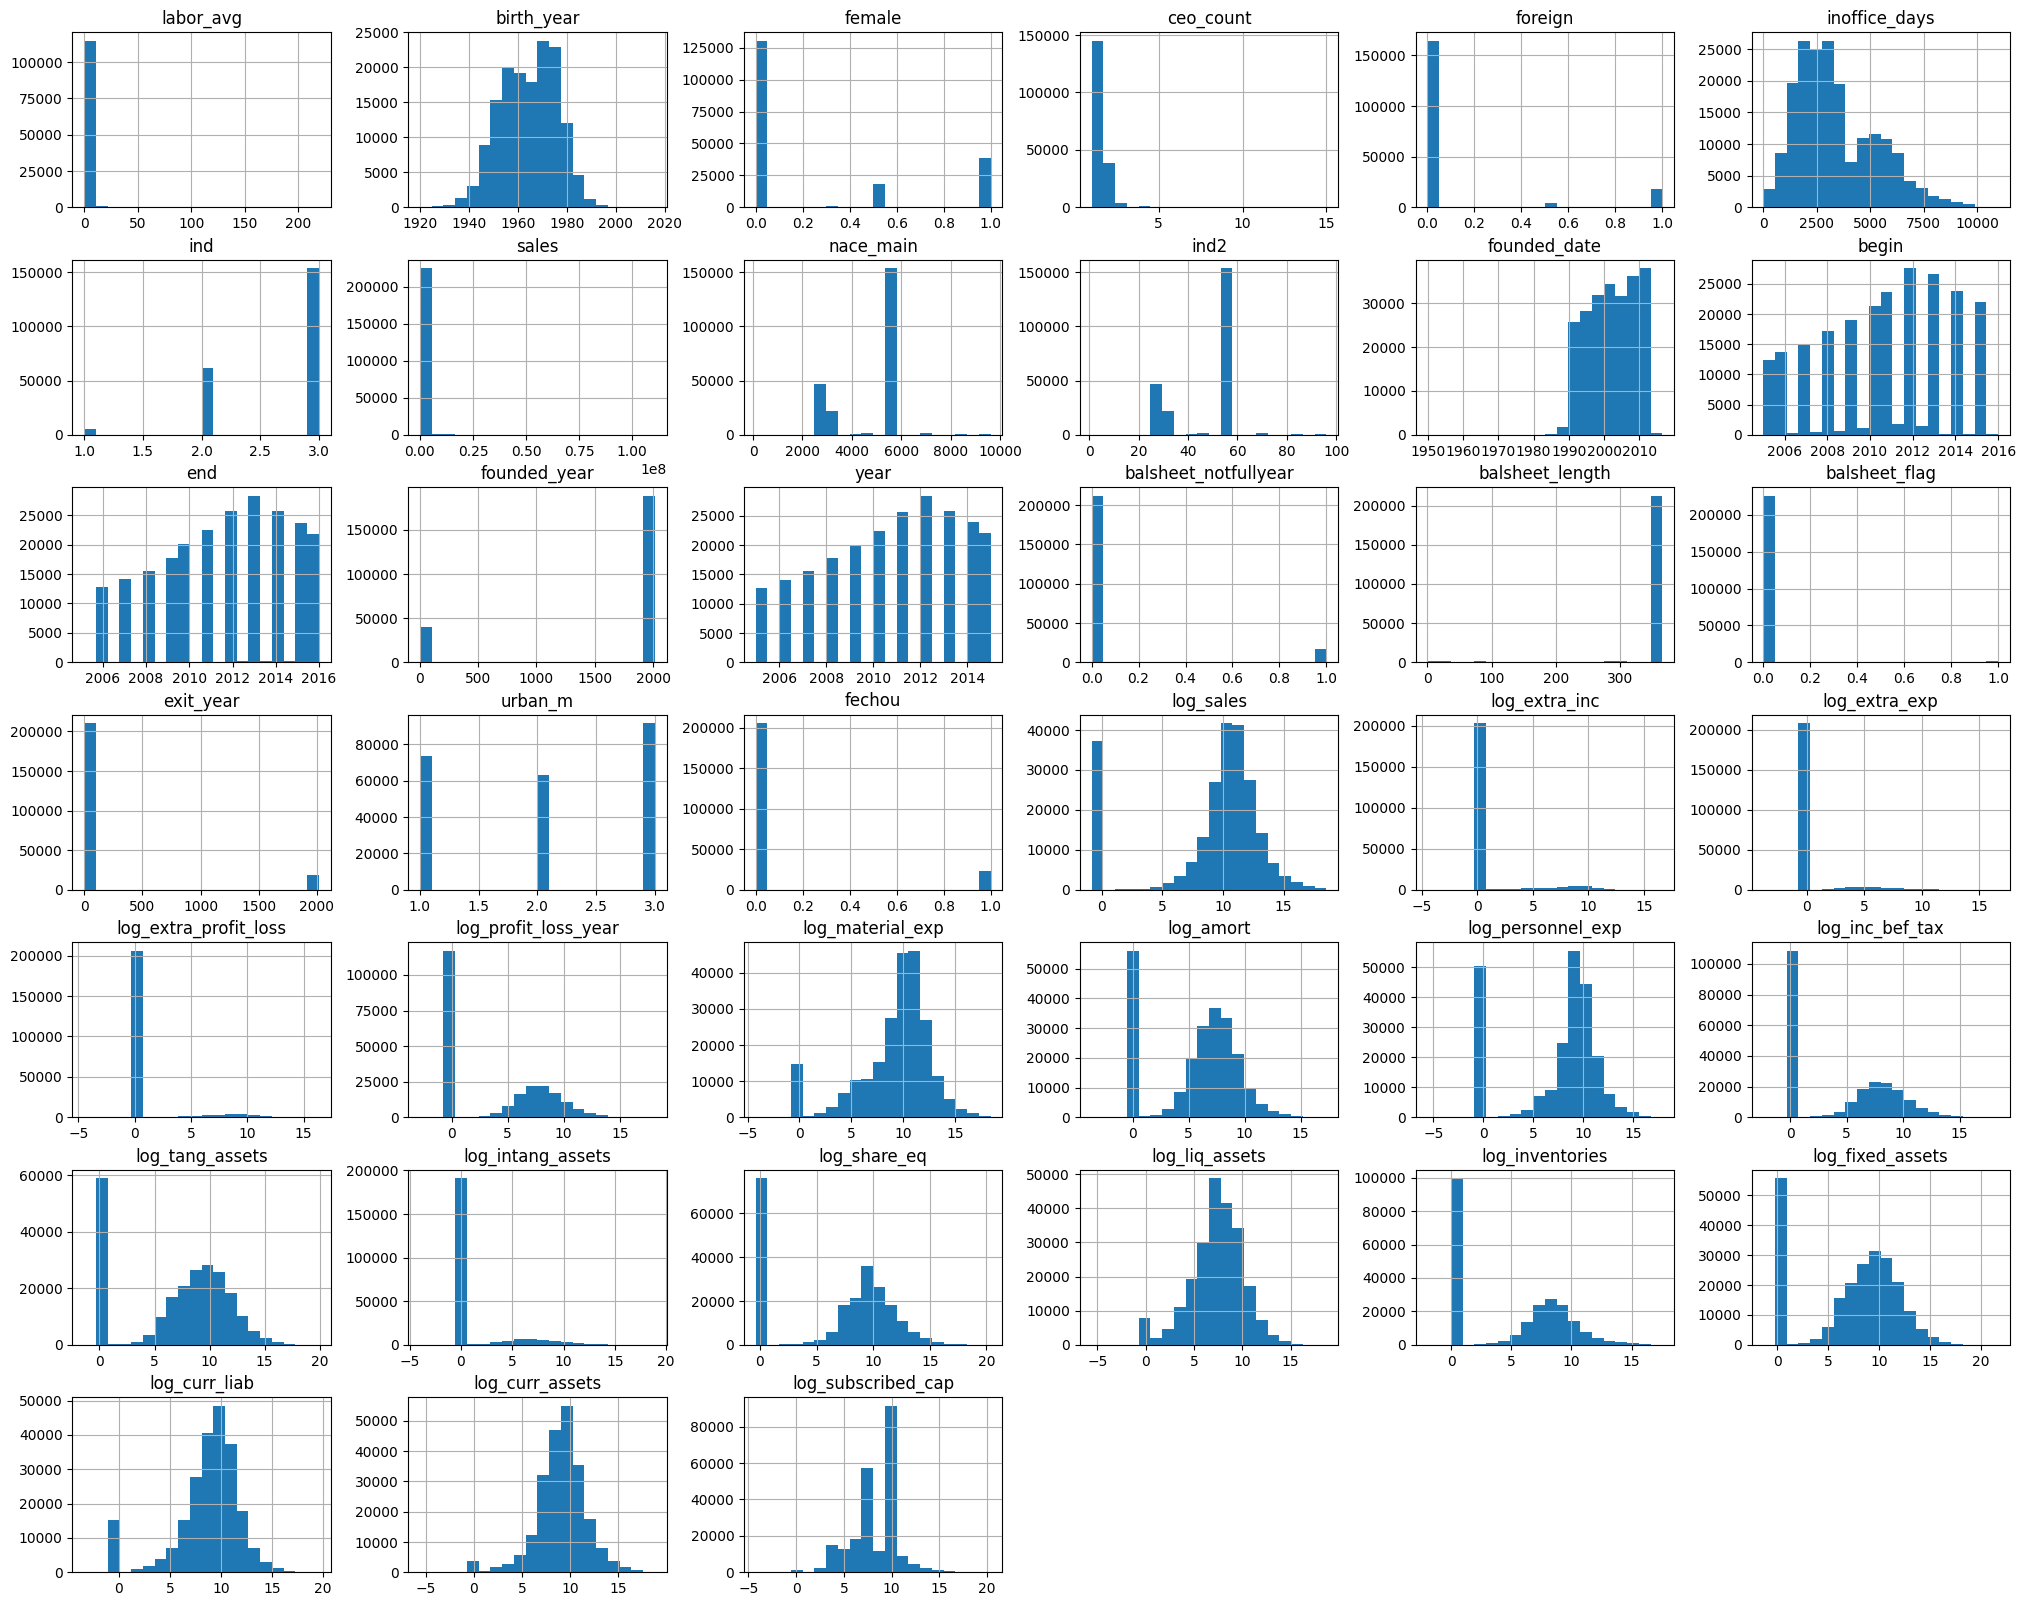

In [39]:
# df2.drop(columns='sales', inplace=True)

# Verificando os histogramas das colunas:

df2.hist(bins=20, figsize=(25,20))

##### Criando nova coluna com idade da empresa:

In [40]:
# Retirando as linhas onde o valor de founded_year é zero, o que não faz sentido:

df3 = df2[df2['founded_year'] != 0]

# Verificando se há valor zero na coluna year, para retirar se necessário:

df3[df3['year'] == 0]

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,ind,sales,nace_main,ind2,region_m,founded_date,comp_id,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,exit_date,fechou,log_sales,log_extra_inc,log_extra_exp,log_extra_profit_loss,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_intang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap


In [41]:
# Criação de nova coluna "comp_age", com idade da empresa:

df3 = df3.copy()

df3['comp_age'] = df3['year'] - df3['founded_year']

df3[['comp_id','founded_year','year','comp_age']].head()


,comp_id,founded_year,year,comp_age
0,1001034.0,1990,2005,15
1,1001034.0,1990,2006,16
2,1001034.0,1990,2007,17
3,1001034.0,1990,2008,18
4,1001034.0,1990,2009,19


##### Filtrando empresas com menos de 10 milhões de Euros em sales e mais de 1000:

In [42]:
df4 = df3[(df3['sales'] < 10000000) & (df3['sales'] > 1000)]

# Selecionando código único das empresas e criando um novo datafram para preparar para o join com a tabela principal

df4 = pd.DataFrame(df4['comp_id'].unique(), columns=['comp_id'])

# Join com a tabela principal para só ter dados de empresas com revenue menor que 10 milhôes de euros e maior que 1000:

df5 = df3.merge(df4, on=['comp_id'], how='inner')

df5.shape

(177080, 45)

In [43]:
# Verificar características da base após tratamento:

df5.describe()

,labor_avg,birth_year,female,ceo_count,foreign,inoffice_days,ind,sales,nace_main,ind2,founded_date,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,fechou,log_sales,log_extra_inc,log_extra_exp,log_extra_profit_loss,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_intang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap,comp_age
count,104112.000000,143914.000000,177080.000000,177080.000000,177080.000000,177080.000000,171117.000000,1.770800e+05,177080.000000,177080.000000,177080,177080,177080,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000
mean,0.768247,1964.341073,0.255437,1.264728,0.102478,3414.510162,2.664417,2.966227e+05,4787.959561,47.646228,2002-03-04 02:28:42.502823552,2011-01-21 12:08:24.992094208,2012-01-12 08:40:09.975152384,2001.654145,2011.035967,0.044709,355.855382,0.002643,181.960442,2.089621,0.061221,9.625608,0.812250,0.508911,0.740195,4.072631,9.590281,5.947134,7.800673,4.584459,7.264063,1.129047,6.595647,7.471669,5.045832,7.423246,8.972362,9.208902,8.127216,9.381822
min,0.000000,1920.000000,0.000000,1.000000,0.000000,10.000000,1.000000,0.000000e+00,111.000000,1.000000,1951-06-07 00:00:00,2005-01-01 00:00:00,2005-06-30 00:00:00,1951.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.819298,-4.212128,-3.806662,-4.212128,-2.825833,-2.197225,-3.652512,-5.598422,-2.379546,-1.393729,-3.988984,-0.160343,-5.598422,-1.960836,-1.393729,-3.295837,-5.598422,-3.295837,-2.000000
25%,0.098485,1956.000000,0.000000,1.000000,0.000000,1998.000000,2.000000,8.896296e+03,3312.000000,33.000000,1996-09-03 00:00:00,2009-01-01 00:00:00,2009-12-31 00:00:00,1996.000000,2009.000000,0.000000,364.000000,0.000000,0.000000,1.000000,0.000000,9.093390,0.000000,0.000000,0.000000,0.000000,8.544232,4.444828,7.114468,0.000000,4.946919,0.000000,0.000000,6.000681,0.000000,5.420207,7.827005,7.951820,7.523941,4.000000
50%,0.250000,1965.000000,0.000000,1.000000,0.000000,3035.000000,3.000000,3.834630e+04,5610.000000,56.000000,2002-02-26 00:00:00,2011-02-03 00:00:00,2011-12-31 00:00:00,2002.000000,2011.000000,0.000000,364.000000,0.000000,0.000000,2.000000,0.000000,10.554413,0.000000,0.000000,0.000000,4.081922,10.194359,6.850597,9.115623,5.703782,8.477142,0.000000,8.611830,7.626498,6.675309,8.611156,9.421261,9.311693,8.399410,9.000000
75%,0.583333,1973.000000,0.500000,1.000000,0.000000,4759.000000,3.000000,1.305870e+05,5610.000000,56.000000,2008-06-30 00:00:00,2013-01-01 00:00:00,2013-12-31 00:00:00,2008.000000,2013.000000,0.000000,364.000000,0.000000,0.000000,3.000000,0.000000,11.779795,0.000000,0.000000,0.000000,7.914631,11.430318,8.389360,10.262100,8.422475,10.610519,0.000000,10.423933,9.227234,8.780127,10.693543,10.713182,10.596727,9.315701,14.000000
max,139.649994,2016.000000,1.000000,15.000000,1.000000,10320.000000,3.000000,1.083056e+08,9609.000000,96.000000,2014-06-04 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2014.000000,2015.000000,1.000000,365.000000,1.000000,2017.000000,3.000000,1.000000,18.500467,16.298644,15.522899,16.298644,17.335023,18.408025,15.702150,17.102693,18.138072,18.887206,18.887206,20.364059,18.321262,16.985710,21.715312,18.994545,18.764990,20.354807,63.000000
std,2.469127,11.370284,0.404206,0.520304,0.291129,1852.167080,0.521715,1.651593e+06,1284.015474,12.912122,NaN,NaN,NaN,6.714314,2.834620,0.206664,44.924500,0.051341,577.548361,0.842768,0.239736,3.810226,2.471328,1.786553,2.382641,4.211859,3.064219,3.495926,3.969537,4.385509,4.496736,2.740307,4.974925,2.638853,4.441148,4.458403,2.863357,2.363617,2.120604,6.4893

O valor mínimo da coluna "comp_age" é -2, o que não faz sentido.

In [44]:
## Filtrar apenas linhas onde o "comp_age" é maior ou igual a 0:

df5[(df5['comp_age'] >= 0)]

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,ind,sales,nace_main,ind2,region_m,founded_date,comp_id,begin,end,founded_year,year,balsheet_notfullyear,balsheet_length,balsheet_flag,exit_year,urban_m,exit_date,fechou,log_sales,log_extra_inc,log_extra_exp,log_extra_profit_loss,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_intang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap,comp_age
0,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,62751.851562,5630.0,56.0,Central,1990-11-19,1001034.0,2005-01-01,2005-12-31,1990,2005,0,364,0,0,1,0,0,11.046943,0.0,0.0,0.0,4.142547,10.551172,6.540442,10.008848,5.386871,7.114468,0.0,6.781604,7.976290,8.379207,7.114468,8.932486,8.891053,7.236259,15
1,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,64625.925781,5630.0,56.0,Central,1990-11-19,1001034.0,2006-01-01,2006-12-31,1990,2006,0,364,0,0,1,0,0,11.076371,0.0,0.0,0.0,6.627453,10.549038,6.403083,10.079307,6.904045,6.587448,0.0,7.400643,8.682080,8.885431,6.587448,9.410102,9.482062,7.236259,16
2,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,65100.000000,5630.0,56.0,Central,1990-11-19,1001034.0,2007-01-01,2007-12-31,1990,2007,0,364,0,0,1,0,0,11.083680,0.0,0.0,0.0,0.000000,10.600977,6.054265,10.010680,6.346286,7.187069,0.0,7.398378,5.180534,8.981160,7.187069,8.961879,9.011438,7.236259,17
3,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,78085.187500,5630.0,56.0,Central,1990-11-19,1001034.0,2008-01-01,2008-12-31,1990,2008,0,365,0,0,1,0,0,11.265556,0.0,0.0,0.0,0.000000,10.901802,5.703782,9.957379,6.572024,6.929734,0.0,7.453519,7.238923,8.562804,6.929734,8.959502,9.046077,7.300798,18
4,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,45388.890625,5630.0,56.0,Central,1990-11-19,1001034.0,2009-01-01,2009-12-31,1990,2009,0,364,0,0,1,0,0,10.723023,0.0,0.0,0.0,0.000000,10.639588,5.334685,9.490774,0.000000,6.702961,0.0,0.000000,2.407946,8.089255,6.702961,9.635608,8.544232,7.300798,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177075,NaN,NaN,1.0,1.0,Domestic,0.0,female,8187.0,3.0,259.259247,5510.0,55.0,East,1990-08-22,464120938496.0,2010-01-01,2010-12-31,1990,2010,0,364,0,0,2,0,0,5.557829,0.0,0.0,0.0,2.407946,3.506558,0.000000,5.403678,2.407946,0.000000,0.0,7.485201,7.464191,0.000000,0.000000,0.000000,7.485201,7.013116,20
177076,NaN,NaN,1.0,1.0,Domestic,0.0,female,8187.0,3.0,288.888885,5510.0,55.0,East,1990-08-22,464120938496.0,2011-01-01,2011-12-31,1990,2011,0,364,0,0,2,0,0,5.666042,0.0,0.0,0.0,3.101093,3.611918,0.000000,5.420207,3.255243,0.000000,0.0,7.497597,7.499649,0.000000,0.000000,1.309333,7.499649,7.013116,21
177077,NaN,NaN,1.0,1.0,Domestic,0.0,female,8187.0,3.0,0.000000,5510.0,55.0,East,1990-08-22,464120938496.0,2012-01-01,2012-12-31,1990,2012,0,365,0,0,2,0,0,0.000000,0.0,0.0,0.0,0.000000,4.567430,0.000000,5.653139,0.000000,0.000000,0.0,7.259976,7.325491,0.000000,0.000000,4.567430,7.325491,7.013116,22
177078,NaN,1942.0,1.0,1.0,Domestic,0.0,female,1441.0,3.0,0.000000,5510.0,55.0,East,1990-08-22,464120938496.0,2014-01-01,2014-12-31,1990,2014,0,364,0,0,2,0,1,0.000000,0.0,0.0,0.0,0.000000,5.298317,0.000000,5.716053,0.000000,0.000000,0.0,6.018864,6.427327,0.000000,0.000000,5.452468,6.468389,7.013116,24


In [45]:
# Verificando a porcentagem de valor zero em cada coluna da base, suspeito que há colunas com muitos valor zero:

(df5.eq(0).sum() / len(df5)).sort_values(ascending=False)


balsheet_flag            0.997357
balsheet_notfullyear     0.955291
fechou                   0.938779
log_extra_exp            0.911294
exit_year                0.909702
exit_date                0.909702
log_extra_profit_loss    0.902400
log_extra_inc            0.890513
foreign                  0.882262
log_intang_assets        0.836961
female                   0.689327
log_profit_loss_year     0.483601
log_inc_bef_tax          0.444042
log_inventories          0.405845
log_share_eq             0.335312
log_tang_assets          0.229134
log_fixed_assets         0.216292
log_amort                0.207516
log_personnel_exp        0.175644
sales                    0.108115
log_sales                0.108115
log_curr_liab            0.043811
log_material_exp         0.041332
comp_age                 0.035052
log_liq_assets           0.027219
log_curr_assets          0.010566
log_subscribed_cap       0.004281
labor_avg                0.000621
balsheet_length          0.000525
region_m      

As colunas balsheet_flag, balsheet_notfullyear, log_extra_exp, log_extra_profit_loss, log_extra_inc, log_intang_assets possuem mais de 50% dos valores como zero, portanto vou retirar essas colunas da base de dados. As colunas de exit_date e exit_year poderiam ser úteis para entender quando a empresa fechou, porém já foi criada uma coluna dizendo se fechou, essas não serão úteis para a modelagem e também serão retiradas. A coluna foreign representa uma porcentagem, portanto não tem problema ter uma incidëncia alta de zeros.

In [46]:
# Retirando as colunas com muita incidência de valor zero:

columns = ['balsheet_flag', 'balsheet_notfullyear', 'log_extra_exp', 
           'log_extra_profit_loss', 'log_extra_inc', 'log_intang_assets', 
           'exit_date', 'exit_year']
       
df6 = df5.drop(columns=columns)

df6.head()

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,ind,sales,nace_main,ind2,region_m,founded_date,comp_id,begin,end,founded_year,year,balsheet_length,urban_m,fechou,log_sales,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap,comp_age
0,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,62751.851562,5630.0,56.0,Central,1990-11-19,1001034.0,2005-01-01,2005-12-31,1990,2005,364,1,0,11.046943,4.142547,10.551172,6.540442,10.008848,5.386871,7.114468,6.781604,7.976290,8.379207,7.114468,8.932486,8.891053,7.236259,15
1,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,64625.925781,5630.0,56.0,Central,1990-11-19,1001034.0,2006-01-01,2006-12-31,1990,2006,364,1,0,11.076371,6.627453,10.549038,6.403083,10.079307,6.904045,6.587448,7.400643,8.682080,8.885431,6.587448,9.410102,9.482062,7.236259,16
2,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,65100.000000,5630.0,56.0,Central,1990-11-19,1001034.0,2007-01-01,2007-12-31,1990,2007,364,1,0,11.083680,0.000000,10.600977,6.054265,10.010680,6.346286,7.187069,7.398378,5.180534,8.981160,7.187069,8.961879,9.011438,7.236259,17
3,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,78085.187500,5630.0,56.0,Central,1990-11-19,1001034.0,2008-01-01,2008-12-31,1990,2008,365,1,0,11.265556,0.000000,10.901802,5.703782,9.957379,6.572024,6.929734,7.453519,7.238923,8.562804,6.929734,8.959502,9.046077,7.300798,18
4,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,45388.890625,5630.0,56.0,Central,1990-11-19,1001034.0,2009-01-01,2009-12-31,1990,2009,364,1,0,10.723023,0.000000,10.639588,5.334685,9.490774,0.000000,6.702961,0.000000,2.407946,8.089255,6.702961,9.635608,8.544232,7.300798,19


In [47]:
# Verificando tamanho da base depois das modificações:

df6.shape

(177080, 37)

In [48]:
df6.describe()

,labor_avg,birth_year,female,ceo_count,foreign,inoffice_days,ind,sales,nace_main,ind2,founded_date,begin,end,founded_year,year,balsheet_length,urban_m,fechou,log_sales,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap,comp_age
count,104112.000000,143914.000000,177080.000000,177080.000000,177080.000000,177080.000000,171117.000000,1.770800e+05,177080.000000,177080.000000,177080,177080,177080,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000,177080.000000
mean,0.768247,1964.341073,0.255437,1.264728,0.102478,3414.510162,2.664417,2.966227e+05,4787.959561,47.646228,2002-03-04 02:28:42.502823552,2011-01-21 12:08:24.992094208,2012-01-12 08:40:09.975152384,2001.654145,2011.035967,355.855382,2.089621,0.061221,9.625608,4.072631,9.590281,5.947134,7.800673,4.584459,7.264063,6.595647,7.471669,5.045832,7.423246,8.972362,9.208902,8.127216,9.381822
min,0.000000,1920.000000,0.000000,1.000000,0.000000,10.000000,1.000000,0.000000e+00,111.000000,1.000000,1951-06-07 00:00:00,2005-01-01 00:00:00,2005-06-30 00:00:00,1951.000000,2005.000000,0.000000,1.000000,0.000000,-0.819298,-2.825833,-2.197225,-3.652512,-5.598422,-2.379546,-1.393729,-0.160343,-5.598422,-1.960836,-1.393729,-3.295837,-5.598422,-3.295837,-2.000000
25%,0.098485,1956.000000,0.000000,1.000000,0.000000,1998.000000,2.000000,8.896296e+03,3312.000000,33.000000,1996-09-03 00:00:00,2009-01-01 00:00:00,2009-12-31 00:00:00,1996.000000,2009.000000,364.000000,1.000000,0.000000,9.093390,0.000000,8.544232,4.444828,7.114468,0.000000,4.946919,0.000000,6.000681,0.000000,5.420207,7.827005,7.951820,7.523941,4.000000
50%,0.250000,1965.000000,0.000000,1.000000,0.000000,3035.000000,3.000000,3.834630e+04,5610.000000,56.000000,2002-02-26 00:00:00,2011-02-03 00:00:00,2011-12-31 00:00:00,2002.000000,2011.000000,364.000000,2.000000,0.000000,10.554413,4.081922,10.194359,6.850597,9.115623,5.703782,8.477142,8.611830,7.626498,6.675309,8.611156,9.421261,9.311693,8.399410,9.000000
75%,0.583333,1973.000000,0.500000,1.000000,0.000000,4759.000000,3.000000,1.305870e+05,5610.000000,56.000000,2008-06-30 00:00:00,2013-01-01 00:00:00,2013-12-31 00:00:00,2008.000000,2013.000000,364.000000,3.000000,0.000000,11.779795,7.914631,11.430318,8.389360,10.262100,8.422475,10.610519,10.423933,9.227234,8.780127,10.693543,10.713182,10.596727,9.315701,14.000000
max,139.649994,2016.000000,1.000000,15.000000,1.000000,10320.000000,3.000000,1.083056e+08,9609.000000,96.000000,2014-06-04 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2014.000000,2015.000000,365.000000,3.000000,1.000000,18.500467,17.335023,18.408025,15.702150,17.102693,18.138072,18.887206,20.364059,18.321262,16.985710,21.715312,18.994545,18.764990,20.354807,63.000000
std,2.469127,11.370284,0.404206,0.520304,0.291129,1852.167080,0.521715,1.651593e+06,1284.015474,12.912122,NaN,NaN,NaN,6.714314,2.834620,44.924500,0.842768,0.239736,3.810226,4.211859,3.064219,3.495926,3.969537,4.385509,4.496736,4.974925,2.638853,4.441148,4.458403,2.863357,2.363617,2.120604,6.489372


##### Retirada de variáveis que não serão úteis para a modelagem:

As seguintes variáveis serão retiradas, com a seguinte justificativa:

**founded_date**: Já há a coluna founded_year, a coluna de data não traz mais valor à modelagem.

**begin e end**: Temos uma coluna de ano representando o período das informações, as colunas "beginin" e "end" não vão trazer mais valor ao modelo e deixa a base mais simples para ser trabalhada.

**sales:** Há a coluna 'log_sales' que será usada no modelo, não há a necessidade de continuar com a 'sales'.

In [49]:
# Selecionando colunas:

columns = ['founded_date', 'begin','end','sales']

# Retirando as colunas selecionadas:

df6.drop(columns=columns, inplace=True)

In [50]:
df6.head()

,labor_avg,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,ind,nace_main,ind2,region_m,comp_id,founded_year,year,balsheet_length,urban_m,fechou,log_sales,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap,comp_age
0,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2005,364,1,0,11.046943,4.142547,10.551172,6.540442,10.008848,5.386871,7.114468,6.781604,7.976290,8.379207,7.114468,8.932486,8.891053,7.236259,15
1,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2006,364,1,0,11.076371,6.627453,10.549038,6.403083,10.079307,6.904045,6.587448,7.400643,8.682080,8.885431,6.587448,9.410102,9.482062,7.236259,16
2,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2007,364,1,0,11.083680,0.000000,10.600977,6.054265,10.010680,6.346286,7.187069,7.398378,5.180534,8.981160,7.187069,8.961879,9.011438,7.236259,17
3,NaN,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2008,365,1,0,11.265556,0.000000,10.901802,5.703782,9.957379,6.572024,6.929734,7.453519,7.238923,8.562804,6.929734,8.959502,9.046077,7.300798,18
4,0.083333,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2009,364,1,0,10.723023,0.000000,10.639588,5.334685,9.490774,0.000000,6.702961,0.000000,2.407946,8.089255,6.702961,9.635608,8.544232,7.300798,19


<Figure size 100x100 with 0 Axes>

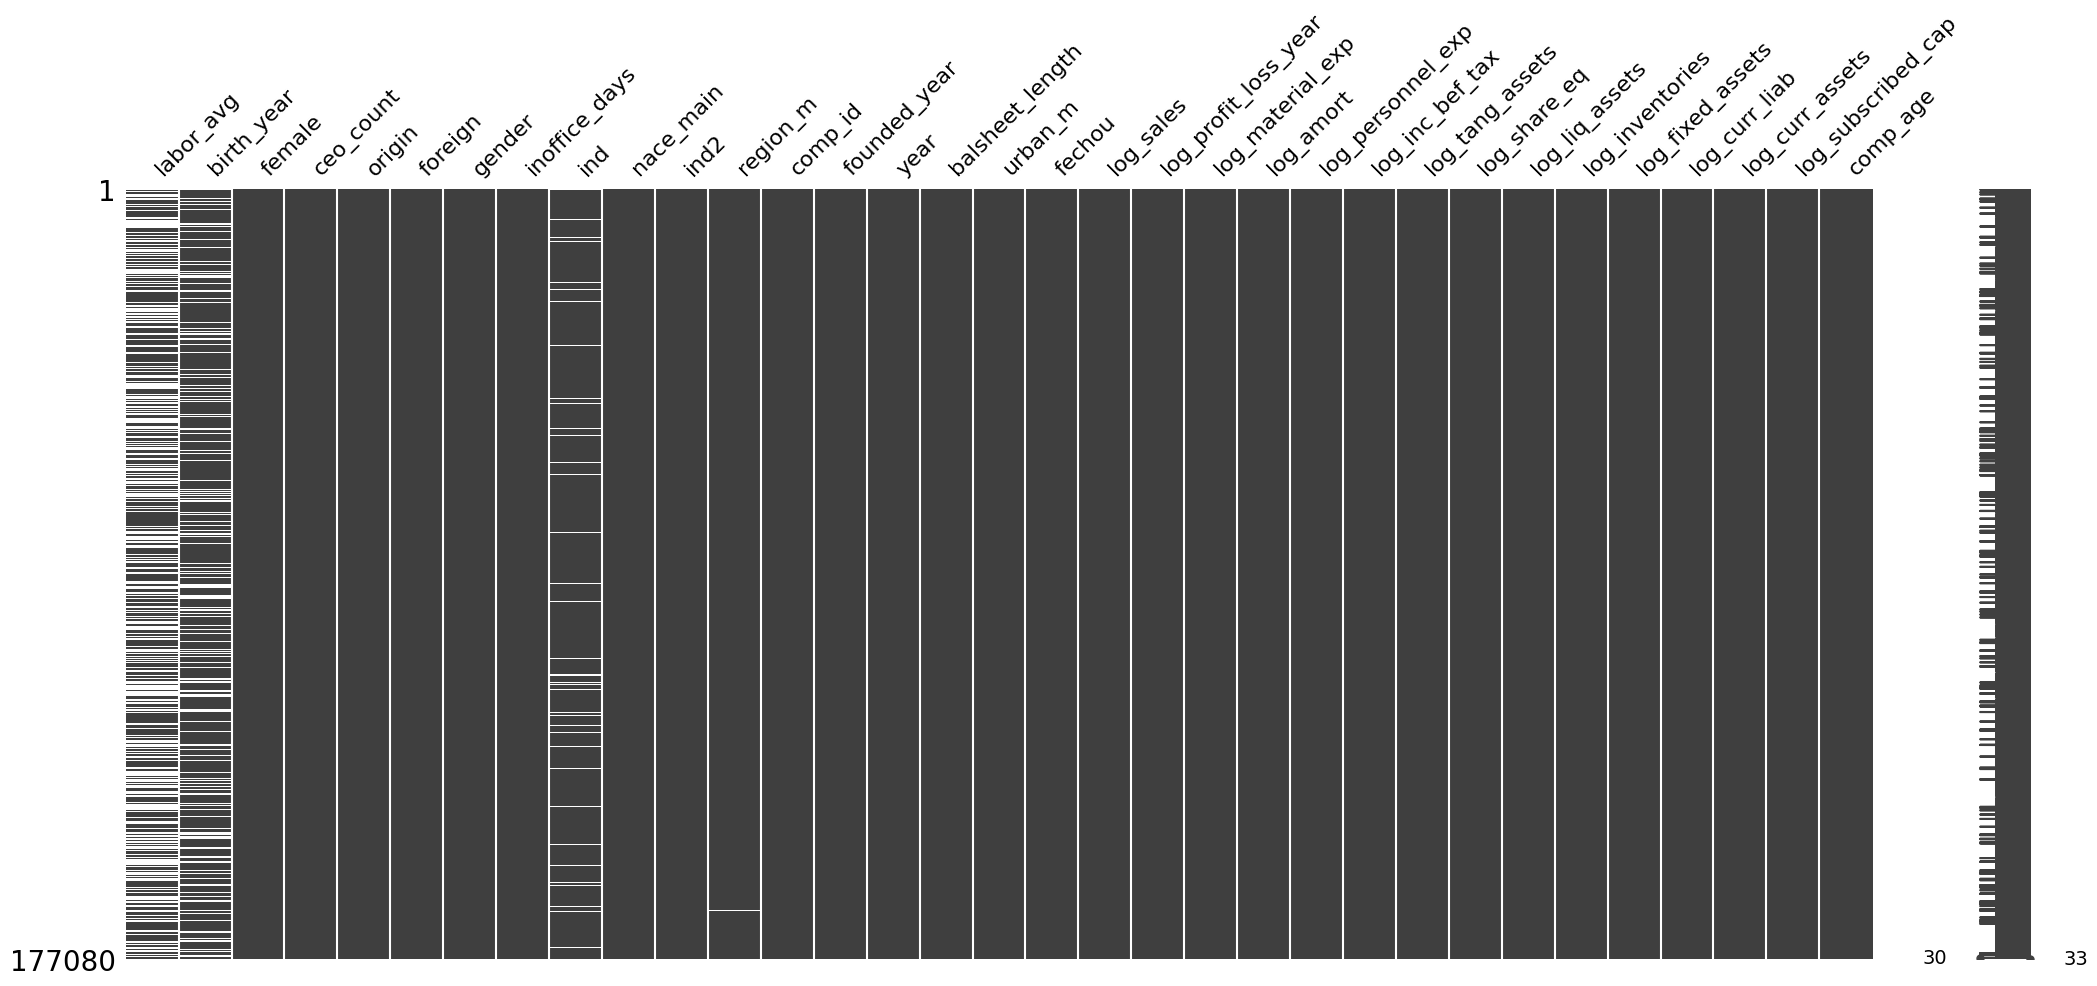

In [51]:
# Verificar novamente valores nulos em colunas:

plt.figure(figsize=(1, 1))  # Altere o tamanho aqui: (largura, altura)
msno.matrix(df6)
plt.show()

As colunas labor_avg, birth_year, ind, sales e region_m ainda continuam com valores nulos. Para não utilizar valores nulos, cada uma das colunas sofrerá uma estratégia para substituir esses valores:

**labor_avg:** Como visto anteriormente, na célula 135, mais de 50% dos valores dessa coluna são nulos. Se eu substituir esses valores por outro, posso afetar o modelo utilizando uma coluna onde a maior parte dos dados foram substituídos. Por isso a estratégia a seguir com essa coluna será retirá-la do modelo.

**birth_year:** Será calculada a média dessa coluna, e esse valor substituirá os nulos.

**ind:** Por se tratar de uma variável categórica, não faria sentido eu calcular a média para substituir os valores nulos. Vou descobrir a moda dessa coluna e substituir os valores nulos com esse valor descoberto.

**region_m:** Se trata de uma variável categórica, portanto novamente será calculada a moda e o valor nulo será substituído por ela.

In [52]:
# Retirar coluna labor_avg da base:

df6.drop(columns='labor_avg', inplace=True)

# Teste se código deu certo:

df6.head()

,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,ind,nace_main,ind2,region_m,comp_id,founded_year,year,balsheet_length,urban_m,fechou,log_sales,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap,comp_age
0,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2005,364,1,0,11.046943,4.142547,10.551172,6.540442,10.008848,5.386871,7.114468,6.781604,7.976290,8.379207,7.114468,8.932486,8.891053,7.236259,15
1,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2006,364,1,0,11.076371,6.627453,10.549038,6.403083,10.079307,6.904045,6.587448,7.400643,8.682080,8.885431,6.587448,9.410102,9.482062,7.236259,16
2,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2007,364,1,0,11.083680,0.000000,10.600977,6.054265,10.010680,6.346286,7.187069,7.398378,5.180534,8.981160,7.187069,8.961879,9.011438,7.236259,17
3,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2008,365,1,0,11.265556,0.000000,10.901802,5.703782,9.957379,6.572024,6.929734,7.453519,7.238923,8.562804,6.929734,8.959502,9.046077,7.300798,18
4,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2009,364,1,0,10.723023,0.000000,10.639588,5.334685,9.490774,0.000000,6.702961,0.000000,2.407946,8.089255,6.702961,9.635608,8.544232,7.300798,19


In [53]:
# Cálculo da média da coluna birth_year, ignorando os valores nulos:

media = df6['birth_year'].mean(skipna=True)

# Trandformando a média em um integer:

media = int(media)

# Substituindo os valores nulos pela média

df6['birth_year'].fillna(media, inplace=True)

C:\Users\marcel.sanchez\AppData\Local\Temp\ipykernel_10592\2305714326.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df6['birth_year'].fillna(media, inplace=True)


In [54]:
# Cálculo da moda da coluna 'ind':

moda = df6['ind'].mode()[0]

# Substituindo os valores nulos pela moda:

df6['ind'].fillna(moda, inplace=True)

C:\Users\marcel.sanchez\AppData\Local\Temp\ipykernel_10592\3819807708.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df6['ind'].fillna(moda, inplace=True)


In [55]:
# Cálculo da moda da coluna 'region_m':

moda2 = df6['region_m'].mode()[0]

# Substituindo os valores nulos pela moda:

df6['region_m'].fillna(moda2, inplace=True)

C:\Users\marcel.sanchez\AppData\Local\Temp\ipykernel_10592\3265364614.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df6['region_m'].fillna(moda2, inplace=True)


<Axes: >

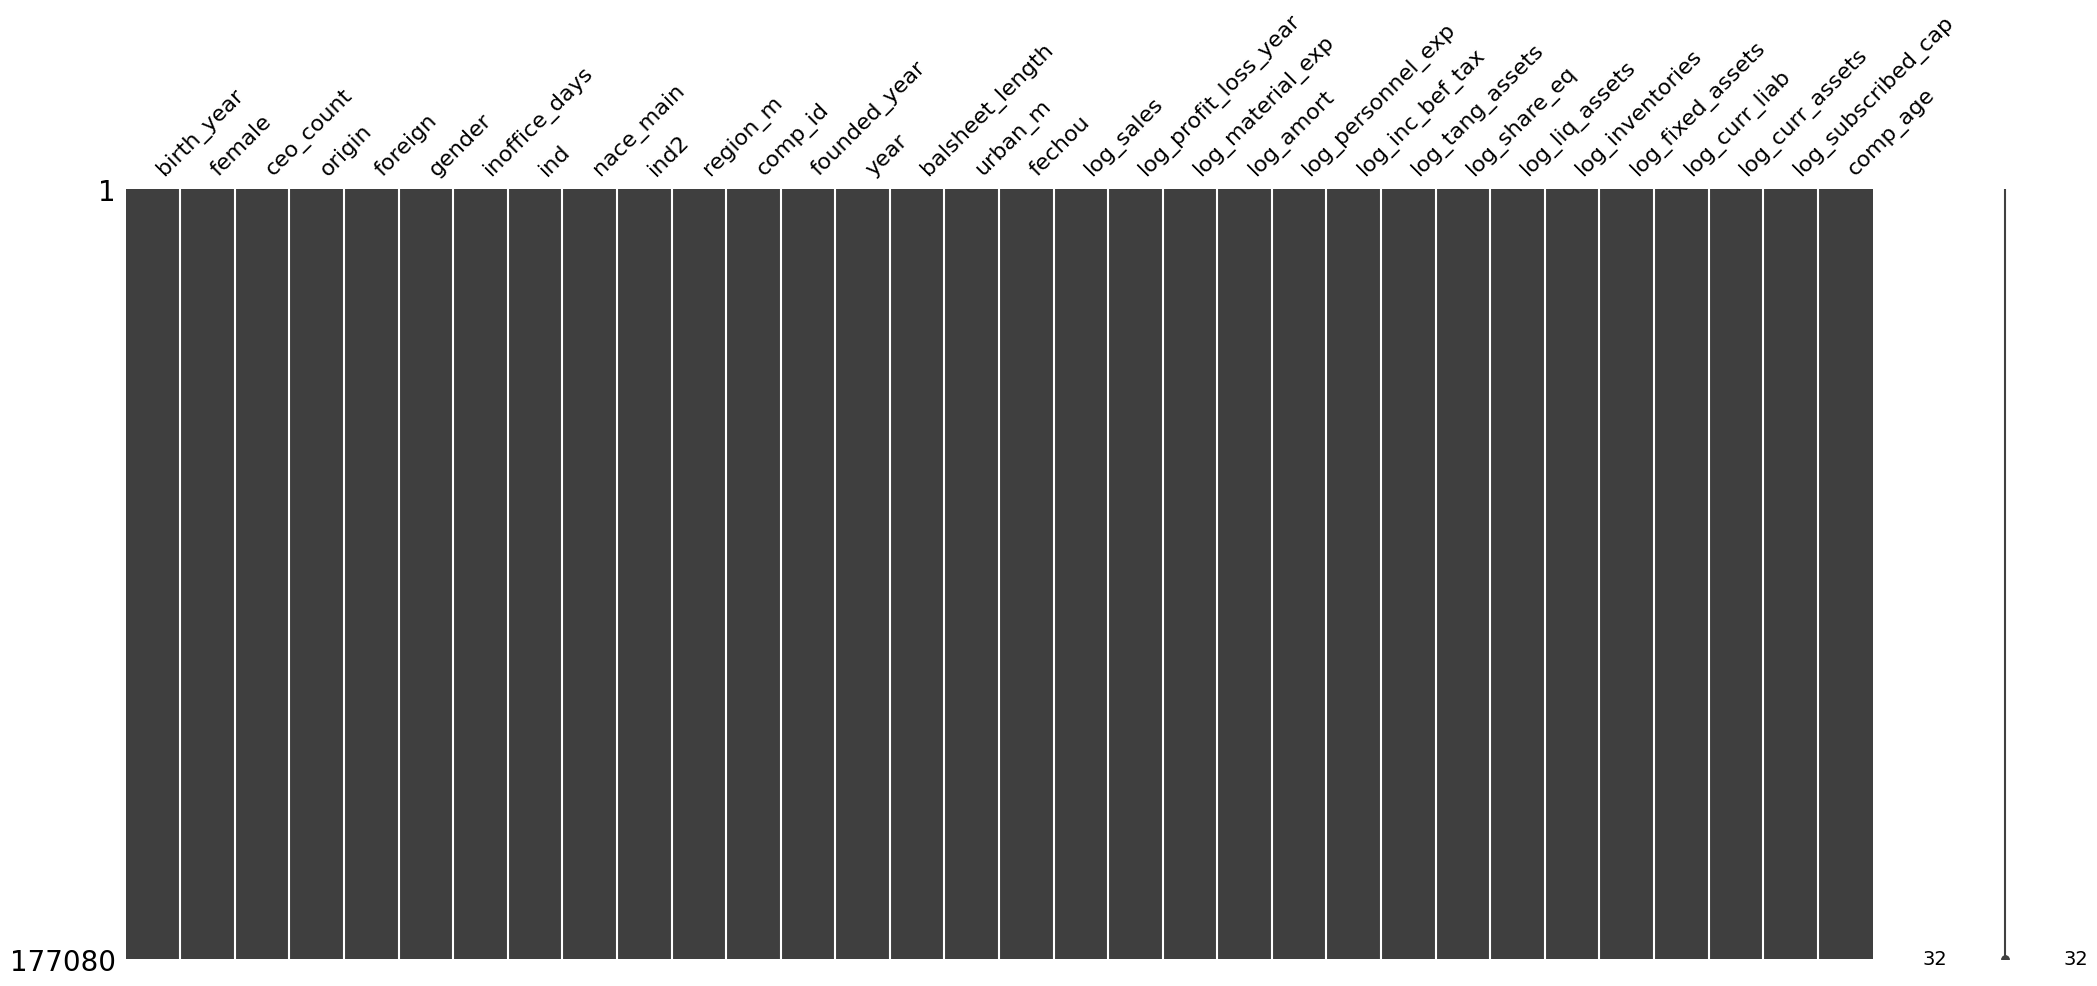

In [56]:
# Verificar novamente valores nulos em colunas:

msno.matrix(df6)

In [57]:
df6.shape

(177080, 32)

array([[<Axes: title={'center': 'birth_year'}>,
        <Axes: title={'center': 'female'}>,
        <Axes: title={'center': 'ceo_count'}>,
        <Axes: title={'center': 'foreign'}>,
        <Axes: title={'center': 'inoffice_days'}>],
       [<Axes: title={'center': 'ind'}>,
        <Axes: title={'center': 'nace_main'}>,
        <Axes: title={'center': 'ind2'}>,
        <Axes: title={'center': 'founded_year'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'balsheet_length'}>,
        <Axes: title={'center': 'urban_m'}>,
        <Axes: title={'center': 'fechou'}>,
        <Axes: title={'center': 'log_sales'}>,
        <Axes: title={'center': 'log_profit_loss_year'}>],
       [<Axes: title={'center': 'log_material_exp'}>,
        <Axes: title={'center': 'log_amort'}>,
        <Axes: title={'center': 'log_personnel_exp'}>,
        <Axes: title={'center': 'log_inc_bef_tax'}>,
        <Axes: title={'center': 'log_tang_assets'}>],
       [<Axes: title={'center'

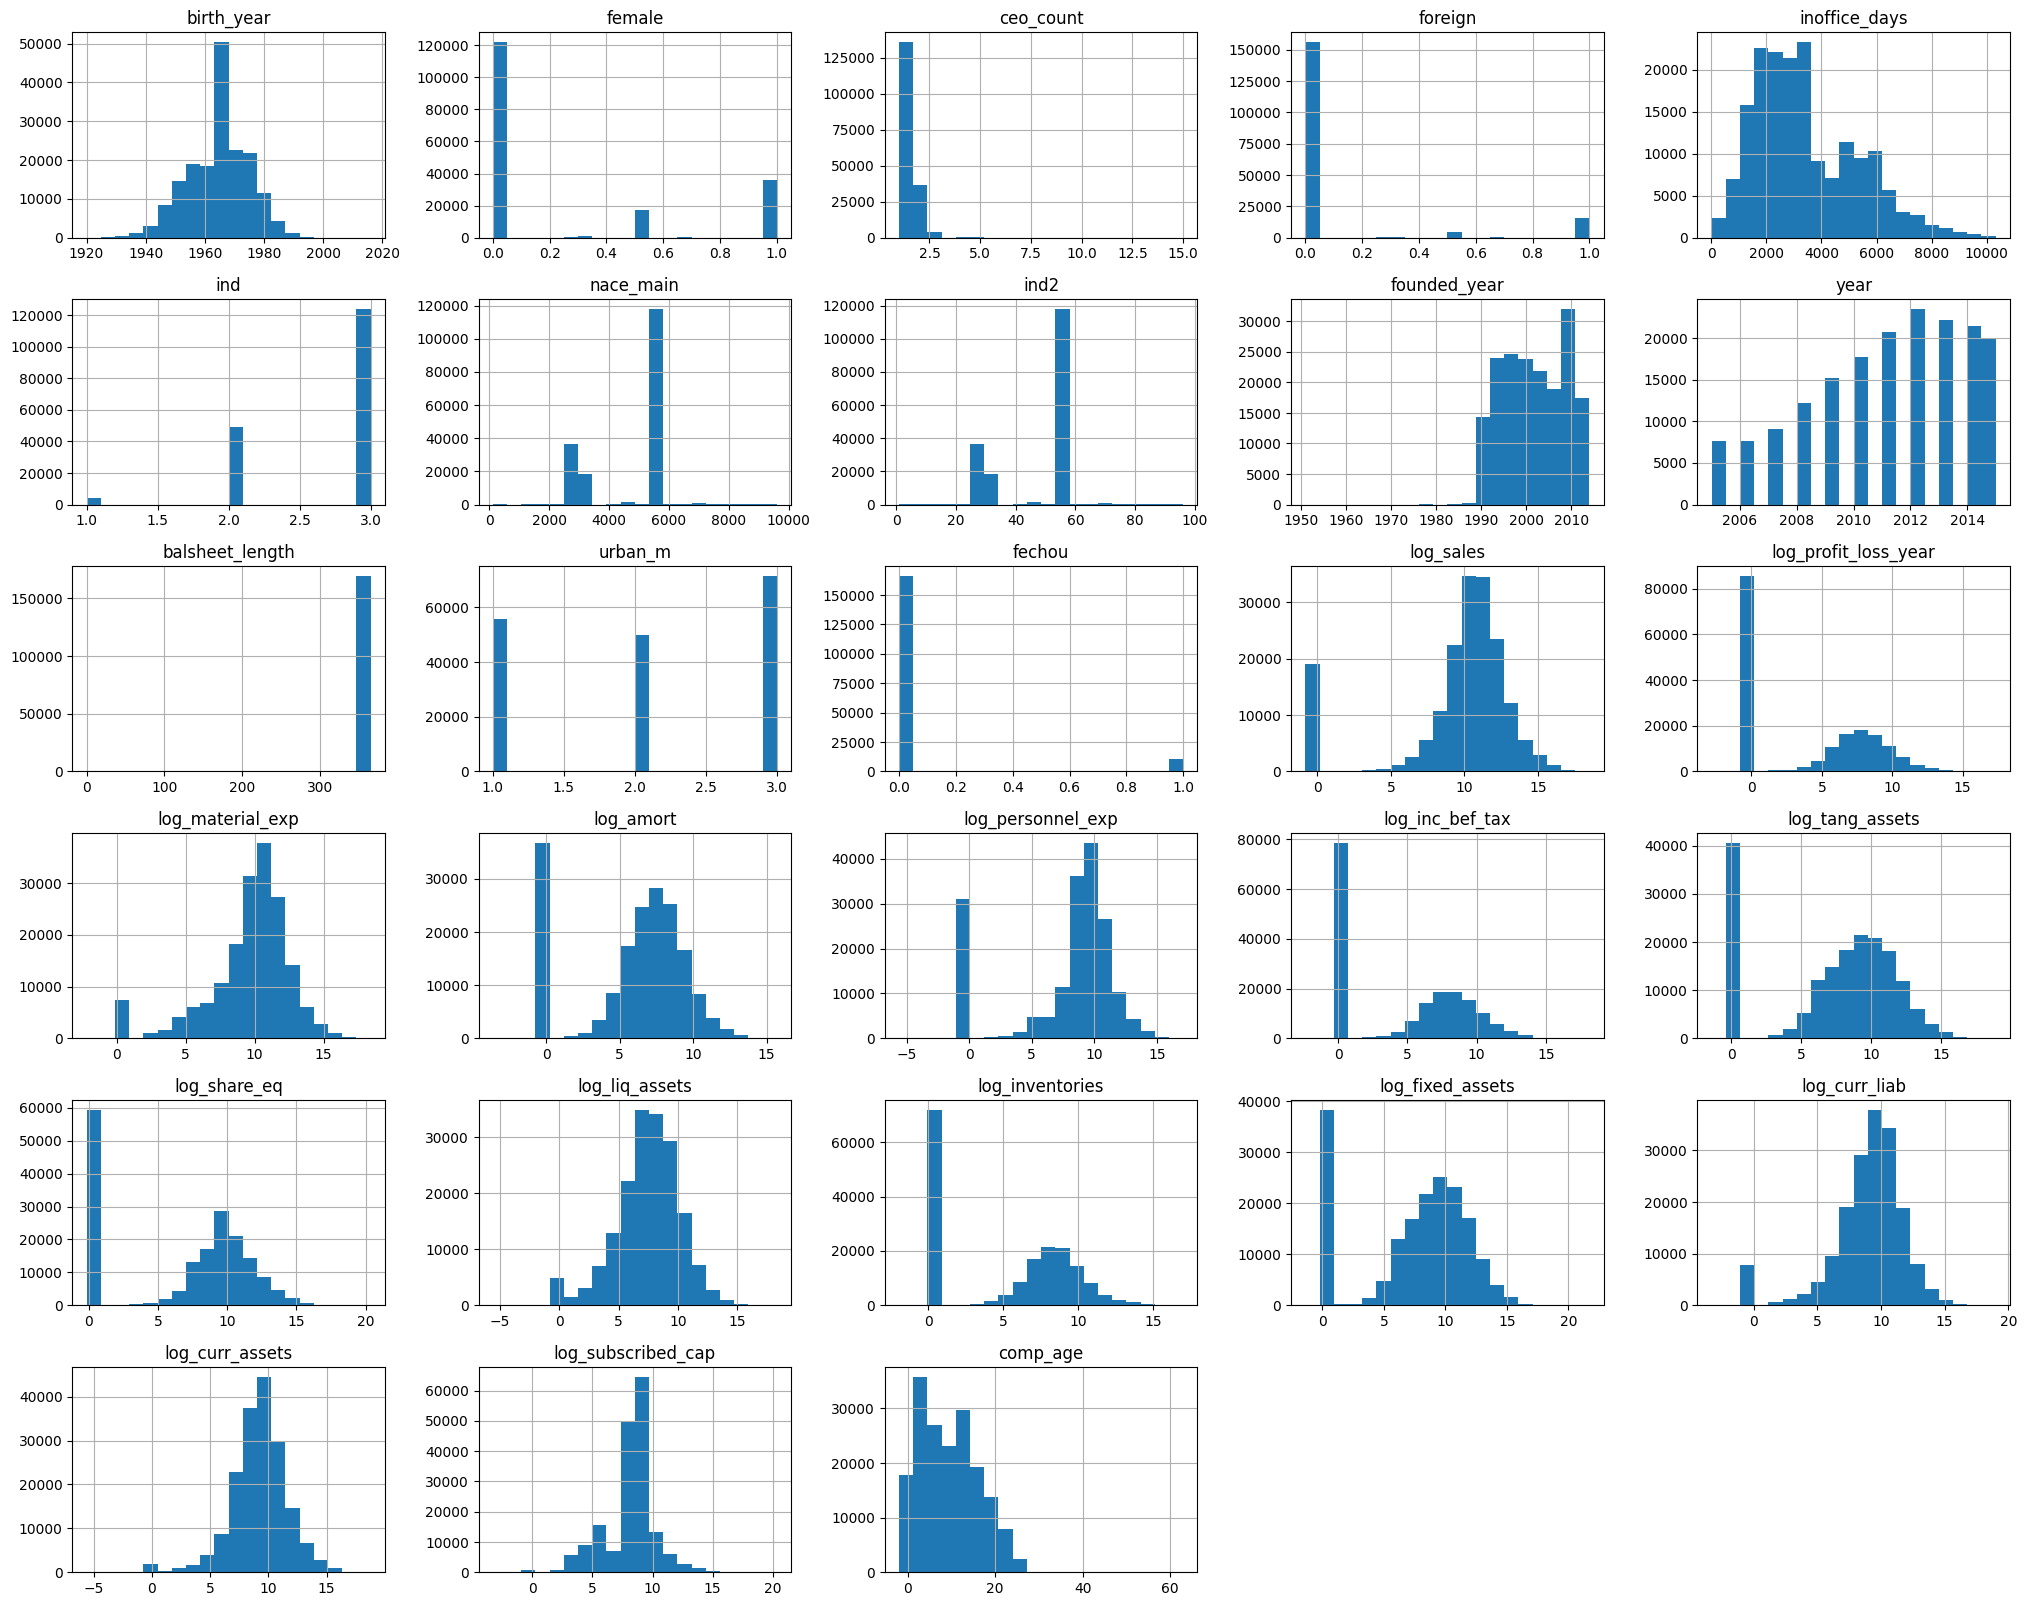

In [58]:
# Verificando os histogramas das variáveis novamente:

df6.hist(bins=20, figsize=(25,20))

In [59]:
# Tabela tratada para modelo:

df6.head(10)

,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,ind,nace_main,ind2,region_m,comp_id,founded_year,year,balsheet_length,urban_m,fechou,log_sales,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap,comp_age
0,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2005,364,1,0,11.046943,4.142547,10.551172,6.540442,10.008848,5.386871,7.114468,6.781604,7.976290,8.379207,7.114468,8.932486,8.891053,7.236259,15
1,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2006,364,1,0,11.076371,6.627453,10.549038,6.403083,10.079307,6.904045,6.587448,7.400643,8.682080,8.885431,6.587448,9.410102,9.482062,7.236259,16
2,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2007,364,1,0,11.083680,0.000000,10.600977,6.054265,10.010680,6.346286,7.187069,7.398378,5.180534,8.981160,7.187069,8.961879,9.011438,7.236259,17
3,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2008,365,1,0,11.265556,0.000000,10.901802,5.703782,9.957379,6.572024,6.929734,7.453519,7.238923,8.562804,6.929734,8.959502,9.046077,7.300798,18
4,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2009,364,1,0,10.723023,0.000000,10.639588,5.334685,9.490774,0.000000,6.702961,0.000000,2.407946,8.089255,6.702961,9.635608,8.544232,7.300798,19
5,1968.0,0.5,2.0,Domestic,0.0,mix,5686.5,3.0,5630.0,56.0,Central,1001034.0,1990,2010,364,1,0,9.203278,0.000000,9.305314,5.180534,8.533358,0.000000,6.456828,0.000000,5.260577,0.000000,6.456828,9.884795,7.647927,7.300798,20
6,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,3.0,5630.0,56.0,Central,1001034.0,1990,2011,364,1,0,0.000000,0.000000,5.298317,5.047003,5.420207,0.000000,6.176868,0.000000,7.398378,0.000000,6.176868,10.023737,8.190745,7.300798,21
7,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,3.0,5630.0,56.0,Central,1001034.0,1990,2012,365,1,1,0.000000,0.000000,7.529924,4.946919,5.653139,0.000000,5.831122,0.000000,3.255243,0.000000,5.831122,9.972530,4.998213,7.300798,22
8,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,3.0,5630.0,56.0,Central,1001034.0,1990,2013,364,1,1,0.000000,0.000000,5.180534,4.946919,5.691360,0.000000,5.298317,0.000000,3.611918,0.000000,5.298317,9.992041,4.946919,7.300798,23
9,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,3.0,5630.0,56.0,Central,1001034.0,1990,2014,364,1,1,0.000000,0.000000,4.743320,3.388775,5.716053,0.000000,5.137975,0.000000,3.707229,0.000000,5.137975,10.014167,4.972895,7.300798,24


Primeiramente usamos essa base acima para o modelo no R, mas tivemos dificuldade em montá-lo, pois haviam empresas repetidas nas linhas, pois há informações de vários anos, e isso dificultou a previsão.

Decidimos então voltar para o Python e seguir uma estratégia diferente, filtrando somente os dados de 2012 para usarmos um ano único e somente uma empresa por linha no modelo:

In [66]:
df7 = df6[df_filter['year'] == 2012.0]
df7.head()

C:\Users\marcel.sanchez\AppData\Local\Temp\ipykernel_10592\3881767561.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df7 = df6[df_filter['year'] == 2012.0]


,birth_year,female,ceo_count,origin,foreign,gender,inoffice_days,ind,nace_main,ind2,region_m,comp_id,founded_year,year,balsheet_length,urban_m,fechou,log_sales,log_profit_loss_year,log_material_exp,log_amort,log_personnel_exp,log_inc_bef_tax,log_tang_assets,log_share_eq,log_liq_assets,log_inventories,log_fixed_assets,log_curr_liab,log_curr_assets,log_subscribed_cap,comp_age
7,1954.0,0.5,2.0,Domestic,0.0,mix,4895.5,3.0,5630.0,56.0,Central,1001034.0,1990,2012,365,1,1,0.000000,0.000000,7.529924,4.946919,5.653139,0.000000,5.831122,0.000000,3.255243,0.000000,5.831122,9.972530,4.998213,7.300798,22
14,1974.0,0.0,1.0,Domestic,0.0,male,3222.0,3.0,5610.0,56.0,Central,1001541.0,2008,2012,365,3,0,7.093159,0.000000,9.030239,6.176868,0.000000,0.000000,12.157757,12.161405,9.110315,0.000000,12.157757,7.172965,9.172600,12.209769,4
23,1975.0,0.0,2.0,Domestic,0.0,male,3101.0,2.0,2711.0,27.0,East,1002029.0,2006,2012,365,3,0,13.943477,9.182170,13.799656,9.611103,10.622230,9.377423,10.063021,11.441907,9.620977,6.518819,10.063021,11.698944,12.225312,9.315701,6
34,1946.0,0.0,1.0,Domestic,0.0,male,6198.0,3.0,5510.0,55.0,West,1011889.0,1992,2005,364,2,0,12.442418,9.327629,12.058346,10.851779,11.102783,9.327629,13.586377,13.421035,9.552879,9.033780,13.586442,8.514968,10.463209,9.773758,13
47,1952.0,1.0,1.0,Domestic,0.0,female,3633.0,3.0,5510.0,55.0,Central,1014183.0,2001,2007,364,2,0,11.528945,9.324330,10.820371,9.321683,10.629604,9.520001,11.763309,12.399505,8.936878,0.000000,11.764721,8.915721,11.707639,9.315701,6


Utilizamos essa base para o modelo em R.

In [ ]:
df7.to_csv('projeto_integrador.csv', index=False)

#### **Elaboração de gráficos para facilitar leitura de dados antes de trabalhar com eles no modelo em R:**

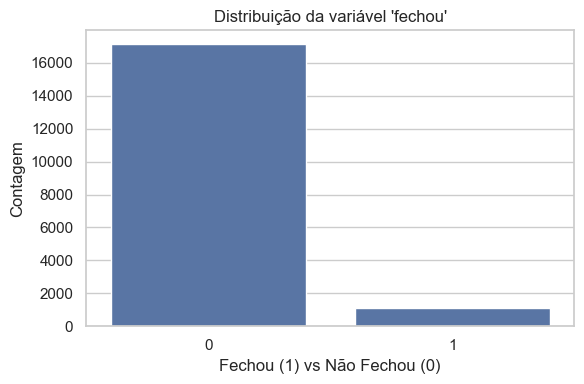

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual dos gráficos (opcional, mas deixa mais bonito)
sns.set(style="whitegrid")

# --- Gráfico 1: Distribuição da variável target 'fechou' ---
plt.figure(figsize=(6, 4))

# Conta quantos registros têm valor 0 e 1 para a variável 'fechou'
sns.countplot(data=df7, x='fechou')

# Título e rótulos dos eixos
plt.title("Distribuição da variável 'fechou'")
plt.xlabel("Fechou (1) vs Não Fechou (0)")
plt.ylabel("Contagem")

# Deixa o layout mais justo com os elementos do gráfico
plt.tight_layout()

# Mostra o gráfico na tela
plt.show()

# ----------------------------
# HIGHLIGHTS:
# - Ideal para ver o desbalanceamento de classes
# - Classe 0 (não fechou) é muito mais frequente que 1 (fechou)
# - Isso pode influenciar modelos de classificação futuramente


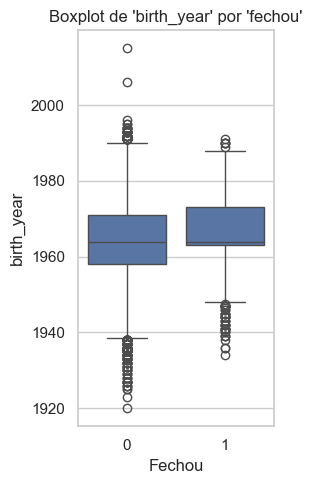

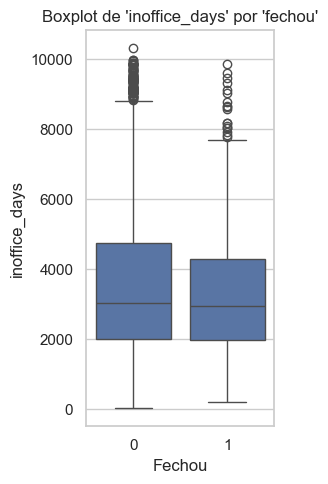

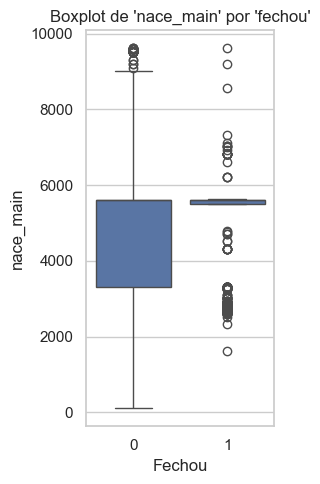

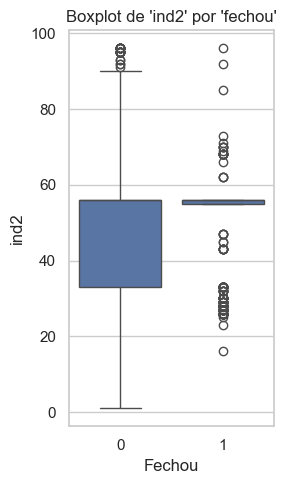

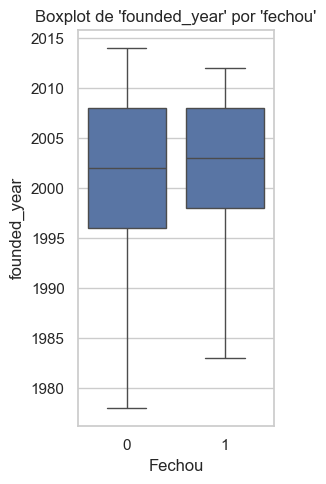

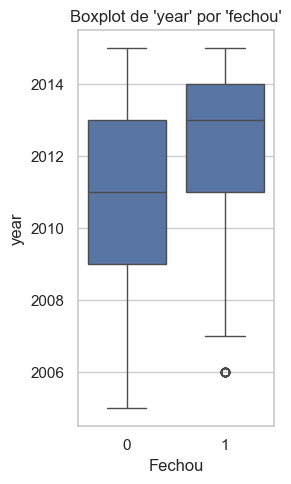

In [68]:
import numpy as np

# Seleciona apenas colunas numéricas, exceto a própria 'fechou'
numeric_cols = df7.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('fechou')

# Filtra colunas que tenham mais de 10 valores distintos (evita colunas com valores repetidos ou constantes)
filtered_cols = [col for col in numeric_cols if df7[col].nunique() > 10]

# Seleciona até 6 colunas para visualização (pode mudar conforme o que quiser explorar)
sample_cols = filtered_cols[:6]

# --- Gráfico 2: Boxplots de variáveis numéricas por 'fechou' ---
for col in sample_cols:
    plt.figure(figsize=(3, 5))

    # Cria um boxplot para a variável atual, separado por classe da target 'fechou'
    sns.boxplot(data=df7, x='fechou', y=col)

    plt.title(f"Boxplot de '{col}' por 'fechou'")
    plt.xlabel("Fechou")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ----------------------------
# HIGHLIGHTS:
# - Ideal para detectar diferenças de distribuição entre as classes
# - Útil para identificar variáveis com poder discriminativo
# - A mediana, outliers e amplitude são fáceis de comparar visualmente


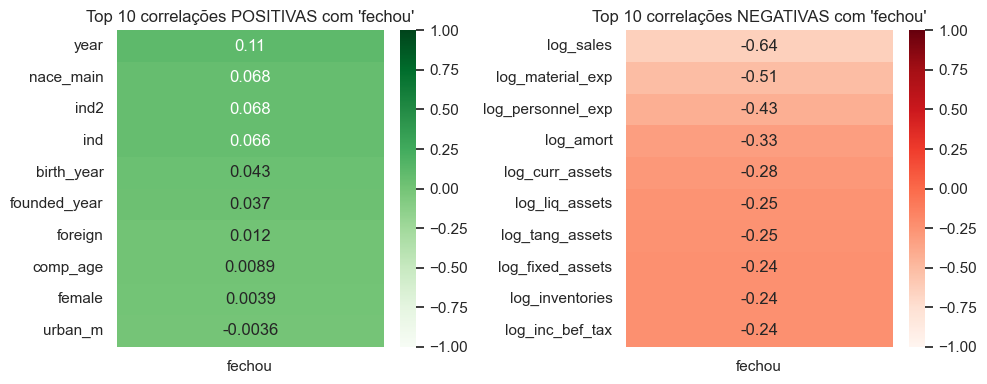

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Seleciona apenas colunas numéricas ---
num_df = df7.select_dtypes(include='number')

# --- Calcula a correlação entre todas as variáveis ---
correlation = num_df.corr()

# --- Separa correlações com a variável target 'fechou' ---
corr_with_target = correlation['fechou'].drop('fechou')  # remove a própria

# --- Top 10 correlações positivas ---
top_pos = corr_with_target.sort_values(ascending=False).head(10)

# --- Top 10 correlações negativas ---
top_neg = corr_with_target.sort_values(ascending=True).head(10)

# --- Cria os dois heatmaps lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Heatmap Positivas
sns.heatmap(top_pos.to_frame(), annot=True, cmap='Greens', ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title("Top 10 correlações POSITIVAS com 'fechou'")

# Heatmap Negativas
sns.heatmap(top_neg.to_frame(), annot=True, cmap='Reds', ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title("Top 10 correlações NEGATIVAS com 'fechou'")

plt.tight_layout()
plt.show()

# ----------------------------
# HIGHLIGHTS:
# - Divide as variáveis em positivas (pró-correlatas com fechamento)
#   e negativas (associadas à permanência no mercado)
# - Útil para interpretar quais variáveis aumentam ou reduzem a chance de fechamento
# - Heatmaps lado a lado ajudam na comparação direta


Empresas que fecharam tendem a ter menor liquidez: passivos > ativos correntes

In [70]:

import altair as alt

# Garante que o limitador de linhas está desabilitado
alt.data_transformers.disable_max_rows()

# Subconjunto com as variáveis escolhidas
alt_df2 = df7[['log_curr_assets', 'log_curr_liab', 'fechou']].dropna()

# Gráfico de dispersão interativo com maior transparência
scatter2 = alt.Chart(alt_df2).mark_circle(size=60, opacity=0.5).encode(
    x='log_curr_assets',
    y='log_curr_liab',
    color=alt.Color('fechou:N', scale=alt.Scale(scheme='tableau10')),
    tooltip=['log_curr_assets', 'log_curr_liab', 'fechou']
).properties(
    width=400,
    height=400,
    title="Dispersão: Ativos Correntes vs Passivos Correntes"
).interactive()

scatter2

alt.Chart(...)

Relação de idade da empresa com o fator "fechou":

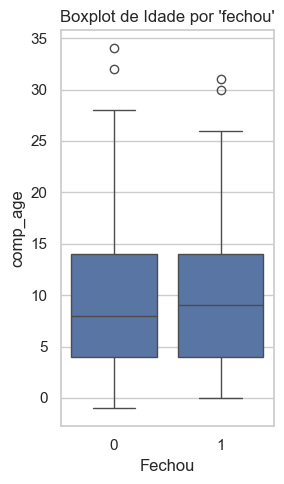

In [72]:


plt.figure(figsize=(3, 5))

# Cria um boxplot para a variável atual, separado por classe da target 'fechou'
sns.boxplot(data=df7, x='fechou', y='comp_age')

plt.title(f"Boxplot de Idade por 'fechou'")
plt.xlabel("Fechou")
plt.ylabel('comp_age')
plt.tight_layout()
plt.show()


Empresas que estavam fechadas em 2012 tendem a ser mais velhas que as abertas.